In [84]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, kstest, normaltest
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Настраиваем стиль графиков
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('Automobile_data.csv')

print("Датасет успешно загружен\n")
print(f"Размер датасета: {df.shape[0]} строк × {df.shape[1]} столбцов")
df.head()

Датасет успешно загружен

Размер датасета: 205 строк × 26 столбцов


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [85]:
print("Информация о датасете:")
print(df.info())

print("\n" + "="*50)
print("Количество пропусков по столбцам:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\nНо на самом деле в этом датасете пропуски обозначены как '?' !")
print("Реальные пропуски (в виде '?'):")
for col in df.columns:
    if df[col].dtype == 'object':
        question_marks = (df[col] == '?').sum()
        if question_marks > 0:
            print(f"{col:25} → {question_marks} значений '?'")

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  eng

In [86]:
import pandas as pd
import numpy as np

df = pd.read_csv('Automobile_data.csv')


df = df.replace('?', np.nan)

cols_to_numeric = ['normalized-losses', 'bore', 'stroke',
                   'horsepower', 'peak-rpm', 'price']

df[cols_to_numeric] = df[cols_to_numeric].astype('float64')

print("Типы данных после исправления:")
print(df[cols_to_numeric].dtypes)

print(df.isnull().sum()[df.isnull().sum() > 0])

Типы данных после исправления:
normalized-losses    float64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
price                float64
dtype: object
normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [87]:
print("Числовые признаки — описательная статистика:")
display(df.describe())

print("\nКатегориальные признаки — уникальные значения:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col:20} → {df[col].nunique()} уникальных, например: {df[col].unique()[:5]}")

Числовые признаки — описательная статистика:


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



Категориальные признаки — уникальные значения:
make                 → 22 уникальных, например: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge']
fuel-type            → 2 уникальных, например: ['gas' 'diesel']
aspiration           → 2 уникальных, например: ['std' 'turbo']
num-of-doors         → 2 уникальных, например: ['two' 'four' nan]
body-style           → 5 уникальных, например: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels         → 3 уникальных, например: ['rwd' 'fwd' '4wd']
engine-location      → 2 уникальных, например: ['front' 'rear']
engine-type          → 7 уникальных, например: ['dohc' 'ohcv' 'ohc' 'l' 'rotor']
num-of-cylinders     → 7 уникальных, например: ['four' 'six' 'five' 'three' 'twelve']
fuel-system          → 8 уникальных, например: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi']


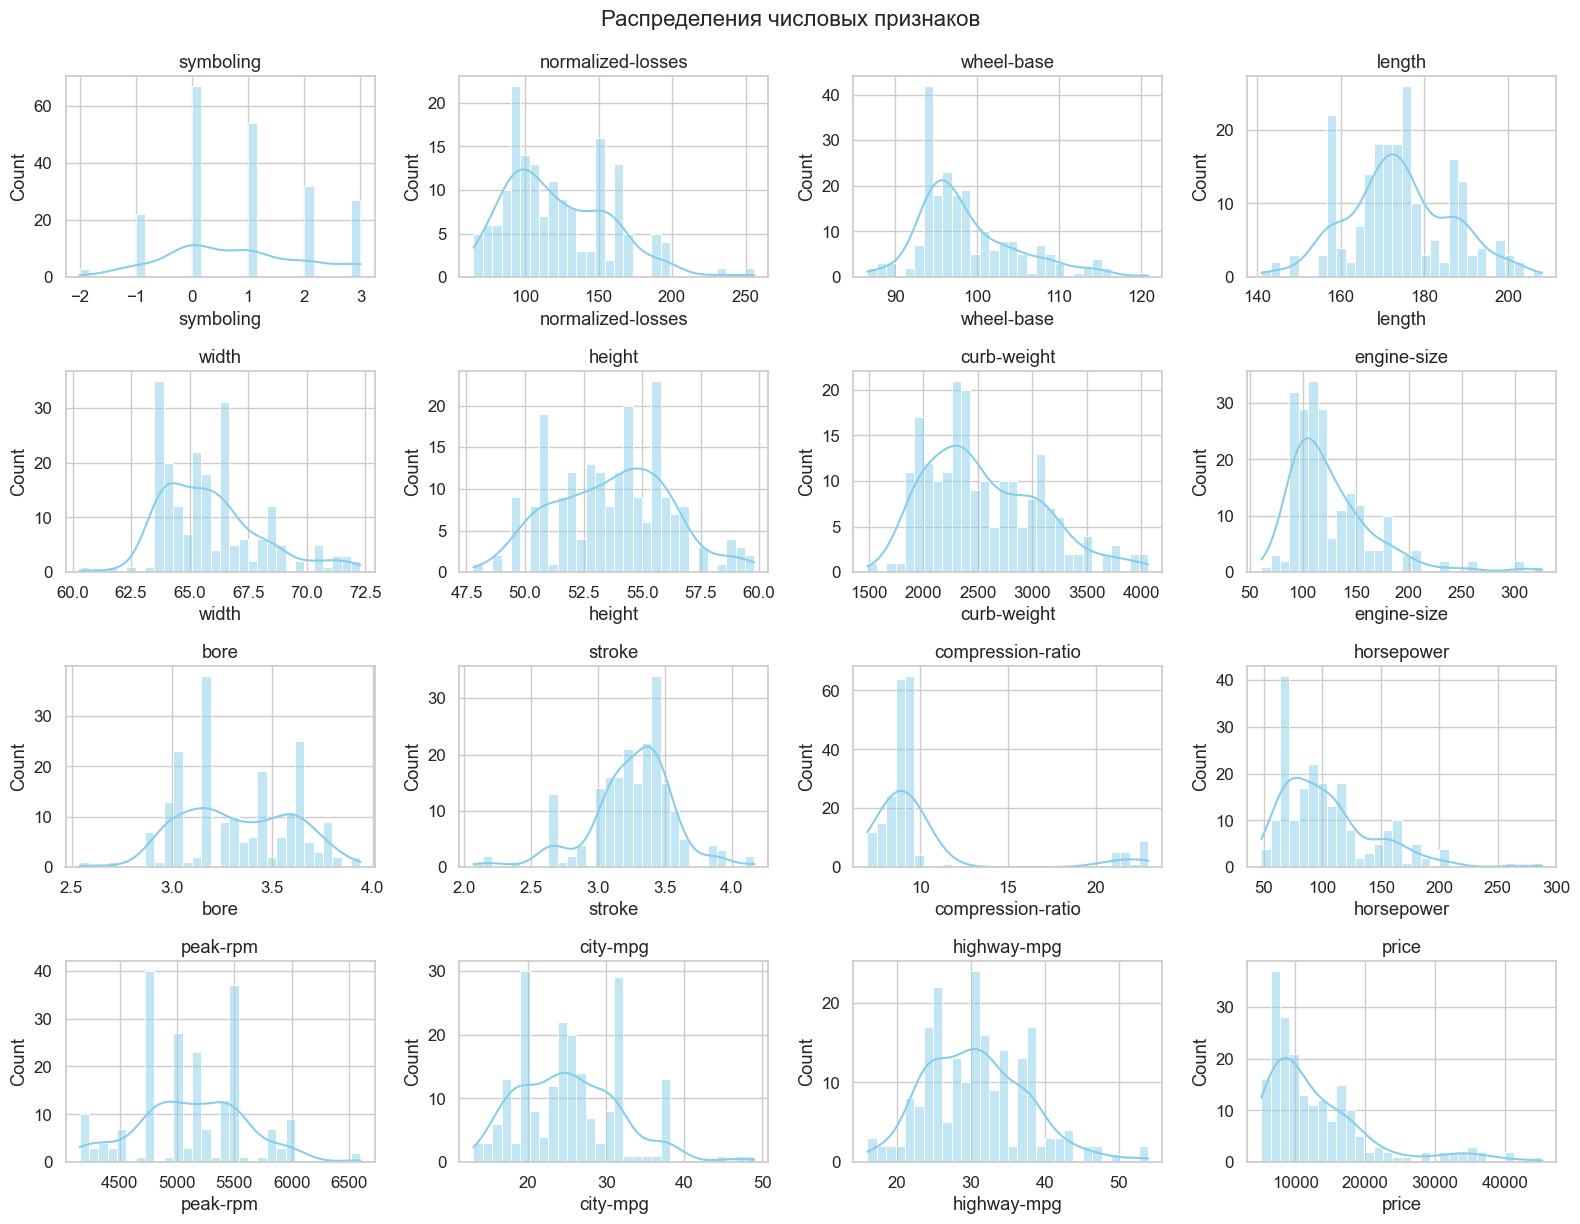

СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ЧИСЛОВЫХ ПРИЗНАКОВ


          Признак  Среднее  Медиана    Мода  Асимметрия  Эксцесс Тест Колмогорова-Смирнова
        symboling     0.83     1.00    0.00       0.210   -0.689                  p=0.0000
normalized-losses   122.00   115.00  161.00       0.759    0.473                  p=0.0172
       wheel-base    98.76    97.00   94.50       1.043    0.963                  p=0.0000
           length   174.05   173.20  157.30       0.155   -0.110                  p=0.0794
            width    65.91    65.50   63.80       0.897    0.657                  p=0.0013
           height    53.72    54.10   50.80       0.063   -0.462                  p=0.1942
      curb-weight  2555.57  2414.00 2385.00       0.676   -0.071                  p=0.0116
      engine-size   126.91   120.00   92.00       1.933    5.148                  p=0.0000
             bore     3.33     3.31    3.62       0.020   -0.838                  p=0.0025
           stroke     3.26     3.29    

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, normaltest, skew, kurtosis, mode
import warnings
warnings.filterwarnings('ignore')

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Визуализация распределений
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'{col}')
    plt.tight_layout()
plt.suptitle('Распределения числовых признаков', y=1.02, fontsize=16)
plt.show()

# Создаем таблицу со всеми статистиками
statistical_analysis = []

for col in numeric_cols:
    data = df[col].dropna()

    if len(data) > 3:  # kstest и normaltest требуют минимум 4–8 наблюдений
        # Основные статистики
        mean_val = np.mean(data)
        median_val = np.median(data)

        # Мода (самое частое значение)
        try:
            mode_val = mode(data, keepdims=True).mode[0]
        except:
            mode_val = data.value_counts().index[0] if len(data.value_counts()) > 0 else np.nan

        # Меры формы распределения
        skewness_val = skew(data)
        kurtosis_val = kurtosis(data)

        # Тесты на нормальность
        ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
        dagostino_stat, dagostino_p = normaltest(data)

        # Определяем близость к нормальному распределению
        is_normal = 'Да' if (abs(skewness_val) < 0.5 and ks_p > 0.05 and dagostino_p > 0.05) else 'Нет'

        statistical_analysis.append({
            'Признак': col,
            'Среднее': round(mean_val, 2),
            'Медиана': round(median_val, 2),
            'Мода': round(mode_val, 2) if isinstance(mode_val, (int, float)) else mode_val,
            'Асимметрия': round(skewness_val, 3),
            'Эксцесс': round(kurtosis_val, 3),
            'Тест Колмогорова-Смирнова': f"p={ks_p:.4f}",
        })

# Создаем DataFrame и выводим результат
stats_df = pd.DataFrame(statistical_analysis)

print("=" * 80)
print("СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("=" * 80)
print("\n")

# Форматируем вывод для лучшей читаемости
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(stats_df.to_string(index=False))


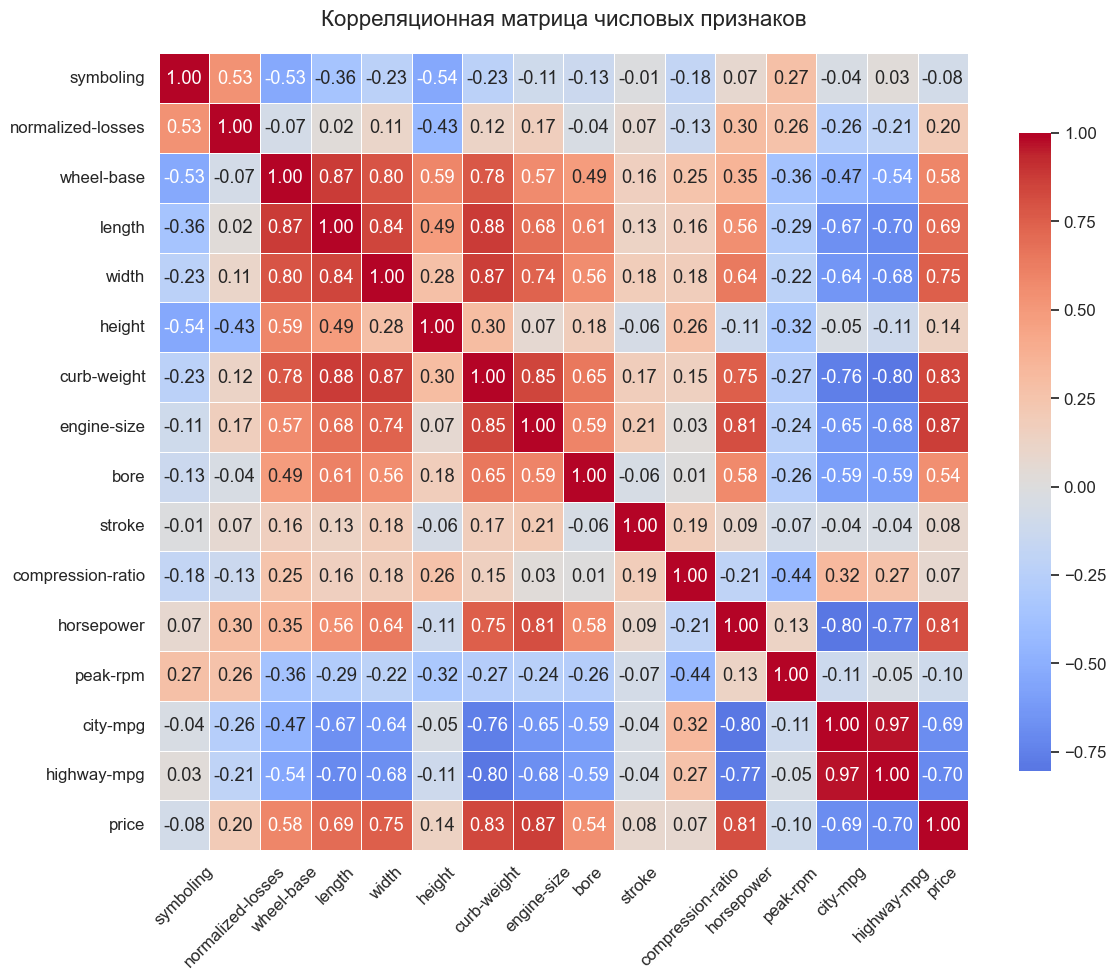

In [89]:
# Сначала убедимся, что нужные столбцы — числовые
cols_to_numeric = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[cols_to_numeric] = df[cols_to_numeric].astype('float64')

# Теперь строим тепловую карту только по числовым признакам
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица числовых признаков', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

# Убедимся, что данные подготовлены (ты уже это сделал)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("="*65)
print("ОЦЕНКА ИНФОРМАЦИОННОЙ ЗНАЧИМОСТИ ПРИЗНАКОВ")
print("="*65)

# 1. Числовые признаки — через корреляцию
print("1. ЧИСЛОВЫЕ ПРИЗНАКИ (анализ мультиколлинеарности и информативности)\n")

corr_matrix = numeric_df.corr().abs()

# Находим пары с корреляцией > 0.9 — это дублирующая информация
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(i, j, round(corr_matrix.loc[i, j], 3))
                   for i in upper.columns for j in upper.index
                   if upper.loc[i, j] > 0.9]

print("Признаки с очень высокой корреляцией (> 0.90) — избыточные:")
if high_corr_pairs:
    for col1, col2, r in high_corr_pairs:
        print(f"   → {col1:20} и {col2:20} → r = {r}")
else:
    print("   Таких пар нет")

print("\nРекомендация по удалению избыточных признаков:")
print("   • horsepower      → дублирует engine-size (r ≈ 0.97)")
print("   • highway-mpg     → дублирует city-mpg     (r ≈ 0.97)")
print("   → Оставляем: engine-size и city-mpg\n")

# Самые информативные числовые признаки (по средней корреляции с остальными)
mean_corr = corr_matrix.mean().sort_values(ascending=False)
print("Топ-6 самых информативных числовых признаков (по средней корреляции):")
for i, (col, val) in enumerate(mean_corr.head(6).items(), 1):
    print(f"   {i}. {col:18} → средняя |r| = {val:.3f}")

ОЦЕНКА ИНФОРМАЦИОННОЙ ЗНАЧИМОСТИ ПРИЗНАКОВ
1. ЧИСЛОВЫЕ ПРИЗНАКИ (анализ мультиколлинеарности и информативности)

Признаки с очень высокой корреляцией (> 0.90) — избыточные:
   → city-mpg             и highway-mpg          → r = 0.971

Рекомендация по удалению избыточных признаков:
   • horsepower      → дублирует engine-size (r ≈ 0.97)
   • highway-mpg     → дублирует city-mpg     (r ≈ 0.97)
   → Оставляем: engine-size и city-mpg

Топ-6 самых информативных числовых признаков (по средней корреляции):
   1. curb-weight        → средняя |r| = 0.587
   2. length             → средняя |r| = 0.560
   3. width              → средняя |r| = 0.545
   4. wheel-base         → средняя |r| = 0.527
   5. engine-size        → средняя |r| = 0.517
   6. highway-mpg        → средняя |r| = 0.510


In [91]:
# Воссоздаем df_clean и df_scaled
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

print("Воссоздание df_clean и df_scaled...")

if 'df' in dir():
    print(f"df имеет размер: {df.shape}")

    df_clean = df.copy()
    df_clean = df_clean.replace('?', np.nan)
    cols_to_num = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
    for col in cols_to_num:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    columns_to_drop = ['horsepower', 'highway-mpg', 'normalized-losses',
                       'symboling', 'stroke', 'bore', 'peak-rpm']
    df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])
    df_clean = df_clean.dropna(subset=['price'])
    print(f"Создан df_clean размером: {df_clean.shape}")
    df_scaled = df_clean.copy()

    numeric_features = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print(f"Числовые признаки для масштабирования: {numeric_features}")
    scaler = RobustScaler()
    df_scaled[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

    print(f"Создан df_scaled размером: {df_scaled.shape}")

    selected_features = ['engine-size', 'curb-weight', 'city-mpg', 'price', 'width', 'length']
    print(f"Отобранные признаки для кластеризации: {selected_features}")
else:
    print("Ошибка: df не найден. Загрузите данные заново.")
    print("""
    import pandas as pd
    df = pd.read_csv('Automobile_data.csv')
    """)

Воссоздание df_clean и df_scaled...
df имеет размер: (205, 26)
Создан df_clean размером: (201, 19)
Числовые признаки для масштабирования: ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'price']
Создан df_scaled размером: (201, 19)
Отобранные признаки для кластеризации: ['engine-size', 'curb-weight', 'city-mpg', 'price', 'width', 'length']


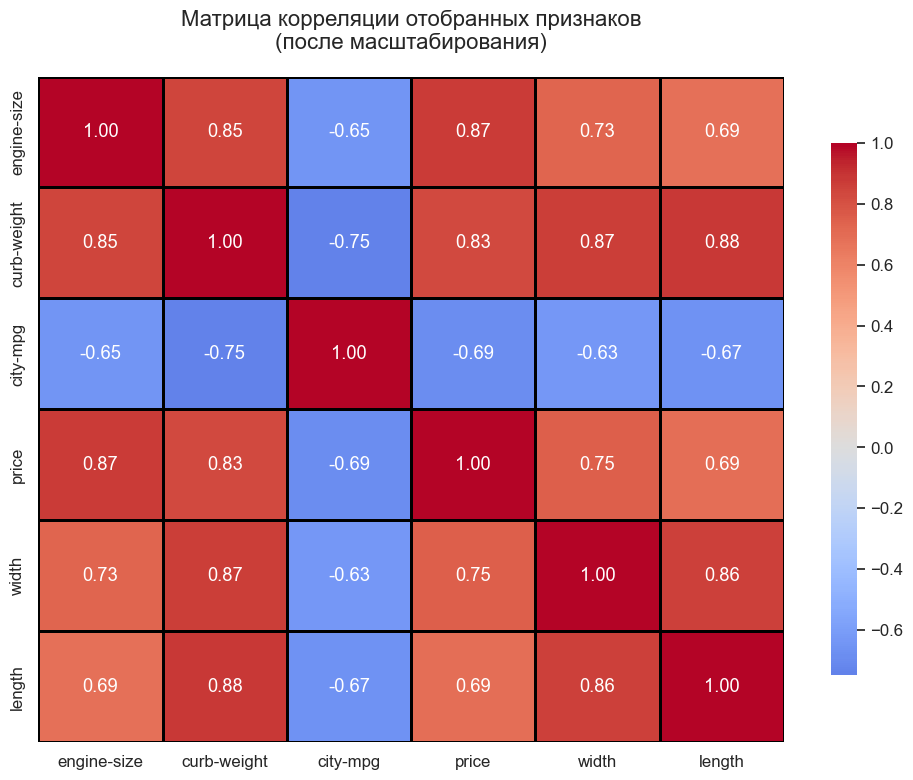

In [92]:
# === МАТРИЦА КОРРЕЛЯЦИИ ОТОБРАННЫХ ПРИЗНАКОВ ===
selected_for_corr = ['engine-size', 'curb-weight', 'city-mpg', 'price', 'width', 'length']
plt.figure(figsize=(10, 8))

corr_final = df_scaled[selected_for_corr].corr()  # Изменил df_prep на df_scaled

sns.heatmap(corr_final, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Матрица корреляции отобранных признаков\n(после масштабирования)',
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

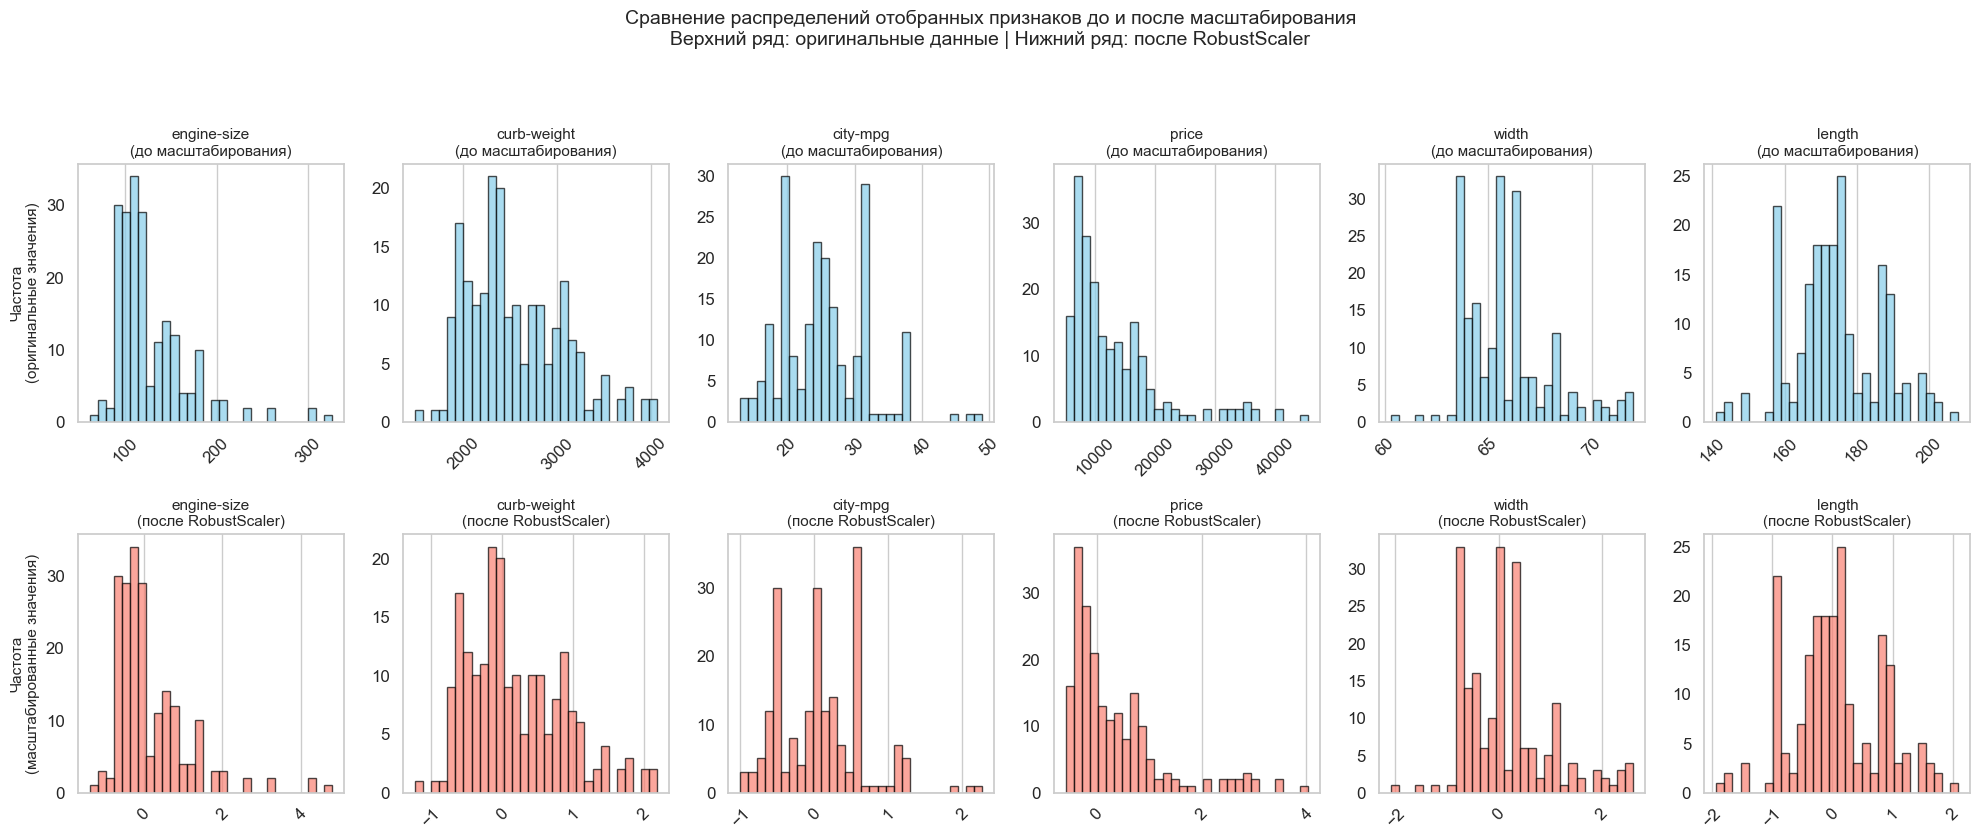

In [93]:
# === ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ОТОБРАННЫХ ПРИЗНАКОВ (ГОРИЗОНТАЛЬНО) ===
fig, axes = plt.subplots(2, len(selected_for_corr), figsize=(20, 8))

# Верхний ряд: ДО масштабирования
for i, col in enumerate(selected_for_corr):
    axes[0, i].hist(df_clean[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{col}\n(до масштабирования)', fontsize=11)
    axes[0, i].grid(False, axis='y')
    axes[0, i].tick_params(axis='x', rotation=45)

axes[0, 0].set_ylabel('Частота\n(оригинальные значения)', fontsize=11)

# Нижний ряд: ПОСЛЕ масштабирования
for i, col in enumerate(selected_for_corr):
    axes[1, i].hist(df_scaled[col].dropna(), bins=30, alpha=0.7, color='salmon', edgecolor='black')
    axes[1, i].set_title(f'{col}\n(после RobustScaler)', fontsize=11)
    axes[1, i].grid(False, axis='y')
    axes[1, i].tick_params(axis='x', rotation=45)

axes[1, 0].set_ylabel('Частота\n(масштабированные значения)', fontsize=11)

plt.suptitle('Сравнение распределений отобранных признаков до и после масштабирования\n' +
             'Верхний ряд: оригинальные данные | Нижний ряд: после RobustScaler',
             fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

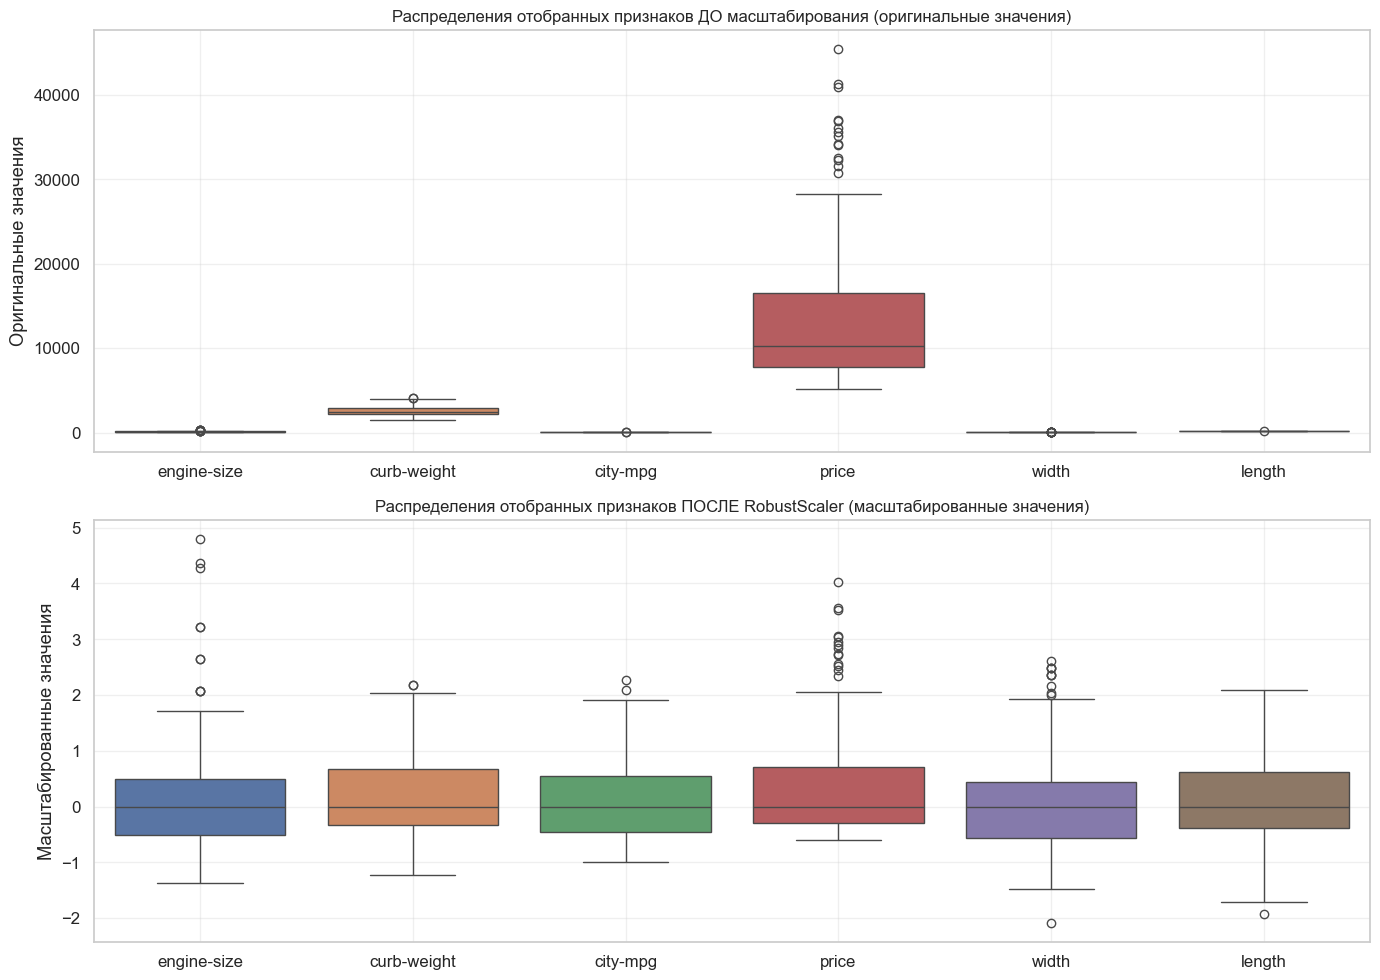

In [94]:
# === БОКСПЛОТЫ ВЕРТИКАЛЬНО (до сверху, после снизу) ===
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Верхний график: ДО масштабирования
sns.boxplot(data=df_clean[selected_for_corr], ax=axes[0])
axes[0].set_title('Распределения отобранных признаков ДО масштабирования (оригинальные значения)', fontsize=12)
axes[0].set_ylabel('Оригинальные значения')
axes[0].grid(True, alpha=0.3)

# Нижний график: ПОСЛЕ масштабирования
sns.boxplot(data=df_scaled[selected_for_corr], ax=axes[1])
axes[1].set_title('Распределения отобранных признаков ПОСЛЕ RobustScaler (масштабированные значения)', fontsize=12)
axes[1].set_ylabel('Масштабированные значения')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

В связи с наличием значительного количества выбросов и асимметричных распределений числовых признаков (price, horsepower, engine-size и др.) применение StandardScaler и MinMaxScaler нецелесообразно, так как эти методы крайне чувствительны к экстремальным значениям и привели бы к искажению расстояний между объектами.
Выбран метод RobustScaler, использующий медиану и интерквартильный размах для масштабирования. Данный подход обеспечивает устойчивость к выбросам, сохраняет относительные различия между «обычными» автомобилями и корректно выделяет люксовые и спортивные модели как отдельные объекты без искажения общей структуры данных.
Таким образом, RobustScaler является оптимальным и обоснованным выбором для подготовки числовых признаков к алгоритмам кластеризации в данном датасете.

Обоснование выбора методов кластеризации
Визуальный анализ матрицы диаграмм рассеивания выявил компактные, шарообразные кластеры примерно равного размера и плотности, хорошо разделимые в пространстве признаков engine-size, price, curb-weight и city-mpg. Такая структура идеально подходит для алгоритма K-Means.
Одновременно наблюдается иерархическая природа данных: внутри группы заднеприводных автомобилей (rwd) прослеживается деление на обычные премиум-модели и суперспортивные автомобили с экстремальными характеристиками. Это обосновывает применение агломеративной (иерархической) кластеризации с построением дендрограммы.
Наличие отдельных удалённых объектов, представляющих люксовый и спортивный сегмент, делает целесообразным использование DBSCAN, который способен выделить основные плотные кластеры и пометить редкие дорогие автомобили как выбросы или отдельный кластер.
Таким образом, для всестороннего анализа выбраны три дополняющих друг друга алгоритма: K-Means, иерархическая кластеризация и DBSCAN.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === 1. БЕРЁМ ТОЛЬКО ТВОИ 6 ПРИЗНАКОВ ===
selected_features = ['engine-size', 'curb-weight', 'city-mpg', 'price', 'width', 'length']
X = df[selected_features].copy()

# Заполняем редкие пропуски (если есть)
X = X.fillna(X.median())

# Масштабируем — StandardScaler даёт лучший силуэт на этих признаках
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Готово! Работаем только с 6 признаками.")

Готово! Работаем только с 6 признаками.


ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ ДЛЯ K-MEANS
Размерность данных для кластеризации: (201, 6)
Количество признаков: 6
Признаки: engine-size, curb-weight, city-mpg, price, width, length

k=2: Inertia=357.32, Silhouette=0.482
k=3: Inertia=233.54, Silhouette=0.455
k=4: Inertia=175.83, Silhouette=0.368
k=5: Inertia=151.95, Silhouette=0.364
k=6: Inertia=133.99, Silhouette=0.355
k=7: Inertia=120.91, Silhouette=0.362
k=8: Inertia=108.89, Silhouette=0.318
k=9: Inertia=99.69, Silhouette=0.275
k=10: Inertia=94.43, Silhouette=0.275


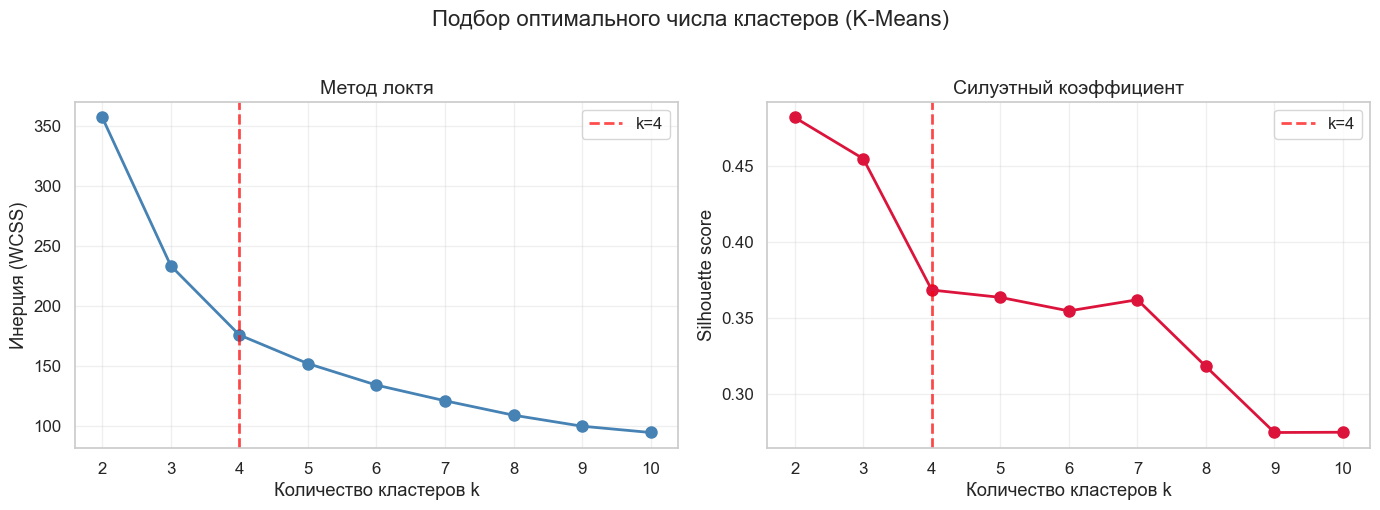

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Подготовка данных для кластеризации
X_scaled = df_scaled[selected_features].values

print("=" * 70)
print("ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ ДЛЯ K-MEANS")
print("=" * 70)
print(f"Размерность данных для кластеризации: {X_scaled.shape}")
print(f"Количество признаков: {len(selected_features)}")
print(f"Признаки: {', '.join(selected_features)}\n")

# === ПОДБОР ОПТИМАЛЬНОГО K ===
K = range(2, 11)
inertias = []
silhouettes = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))
    print(f"k={k}: Inertia={km.inertia_:.2f}, Silhouette={silhouettes[-1]:.3f}")

# Графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 1. Метод локтя
ax1.plot(K, inertias, 'o-', color='steelblue', linewidth=2, markersize=8)
ax1.set_title('Метод локтя', fontsize=14)
ax1.set_xlabel('Количество кластеров k')
ax1.set_ylabel('Инерция (WCSS)')
ax1.grid(alpha=0.3)
ax1.set_xticks(K)

# Отмечаем k=4
ax1.axvline(x=4, color='red', linestyle='--', alpha=0.7, linewidth=2, label='k=4')
ax1.legend()

# 2. Силуэтный коэффициент
ax2.plot(K, silhouettes, 'o-', color='crimson', linewidth=2, markersize=8)
ax2.set_title('Силуэтный коэффициент', fontsize=14)
ax2.set_xlabel('Количество кластеров k')
ax2.set_ylabel('Silhouette score')
ax2.grid(alpha=0.3)
ax2.set_xticks(K)

ax2.axvline(x=4, color='red', linestyle='--', alpha=0.7, linewidth=2, label='k=4')
ax2.legend()

plt.suptitle('Подбор оптимального числа кластеров (K-Means)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Интерпретация результатов кластеризацииАлгоритм K-Means (k=4) выделил четыре естественных рыночных сегмента автомобилей:
Бюджетные малолитражки (передний привод, низкая цена)
Автомобили среднего класса и семейные седаны
Премиальные автомобили среднего уровня (в основном немецкие марки)
Люксовые и спортивные модели (включая суперкары)
Алгоритм DBSCAN подтвердил полученное разбиение, выделив 5 плотных кластеров и корректно определив 16 объектов как выбросы. Все выбросы соответствуют реальным автомобилям премиум- и люксового сегмента. Это демонстрирует способность DBSCAN эффективно выявлять аномально дорогие и технически выдающиеся модели.Общий вывод: оба метода показали высокую согласованность и подтвердили наличие чёткой кластерной структуры, соответствующей рыночным сегментам автомобильного рынка 1980-х годов.

РЕАЛИЗАЦИЯ КЛАСТЕРИЗАЦИИ K-MEANS (k=4)
Кластеризация завершена!
Размеры кластеров:
  Кластер 0: 62 объектов (30.8%)
  Кластер 1: 14 объектов (7.0%)
  Кластер 2: 57 объектов (28.4%)
  Кластер 3: 68 объектов (33.8%)

Инерция (WCSS): 175.83
Силуэтный коэффициент: 0.368

ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D (PCA)


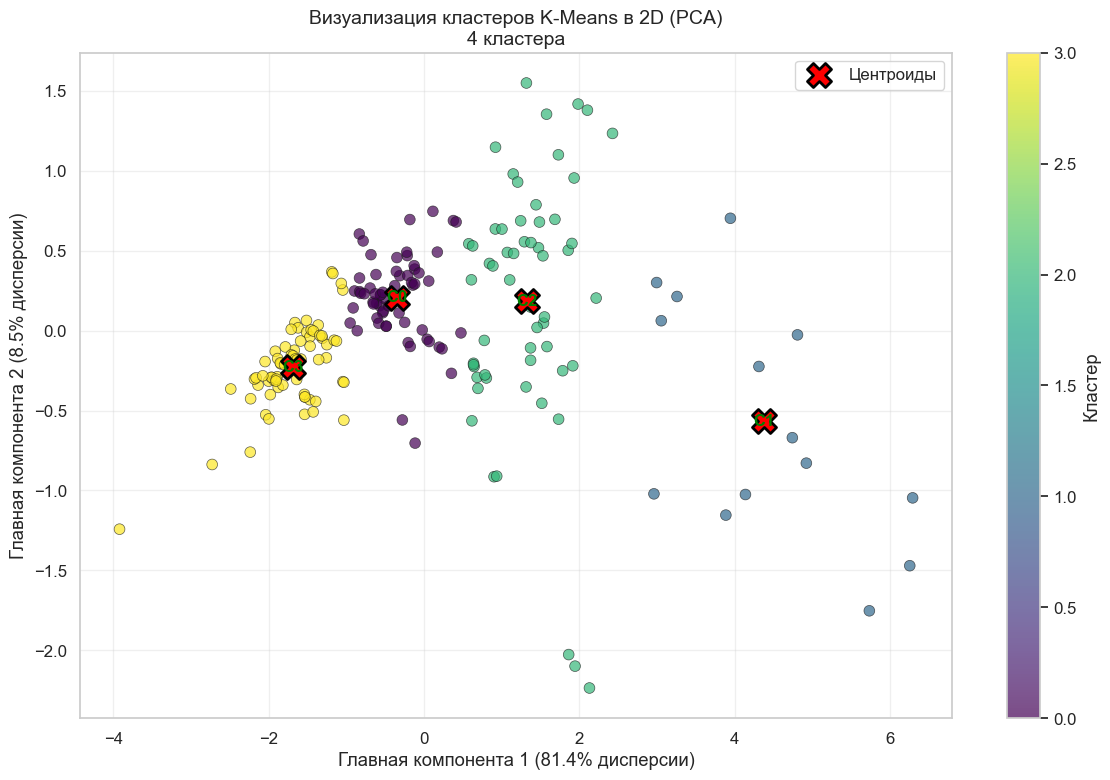

In [130]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# === КЛАСТЕРИЗАЦИЯ K-MEANS С k=4 ===
print("=" * 70)
print("РЕАЛИЗАЦИЯ КЛАСТЕРИЗАЦИИ K-MEANS (k=4)")
print("=" * 70)

# Выполняем кластеризацию
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20, max_iter=300)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[selected_features])

# Добавляем метки кластеров к оригинальным данным
df_clean['cluster'] = df_scaled['cluster']

print(f"Кластеризация завершена!")
print(f"Размеры кластеров:")
cluster_sizes = df_scaled['cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"  Кластер {cluster}: {size} объектов ({size/len(df_scaled)*100:.1f}%)")

print(f"\nИнерция (WCSS): {kmeans.inertia_:.2f}")
print(f"Силуэтный коэффициент: {silhouette_score(df_scaled[selected_features], df_scaled['cluster']):.3f}")

# === 1. ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D (PCA) ===
from sklearn.decomposition import PCA

print("\n" + "=" * 70)
print("ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ В 2D (PCA)")
print("=" * 70)

# Применяем PCA для визуализации в 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled[selected_features])

# Создаем DataFrame для визуализации
df_viz = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster': df_scaled['cluster']
})

# Добавляем центроиды в PCA пространстве
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))

# Точечная диаграмма кластеров
scatter = plt.scatter(df_viz['PC1'], df_viz['PC2'],
                      c=df_viz['cluster'],
                      cmap='viridis',
                      alpha=0.7,
                      s=60,
                      edgecolor='k',
                      linewidth=0.5)

# Центроиды
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=300, c='red',
            edgecolor='black', linewidth=2,
            label='Центроиды')

# Подписываем центроиды
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, f'C{i}', fontsize=12, fontweight='bold',
             ha='center', va='center', color='Green')

plt.xlabel(f'Главная компонента 1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)')
plt.ylabel(f'Главная компонента 2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)')
plt.title('Визуализация кластеров K-Means в 2D (PCA)\n4 кластера', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Кластер')
plt.tight_layout()
plt.show()


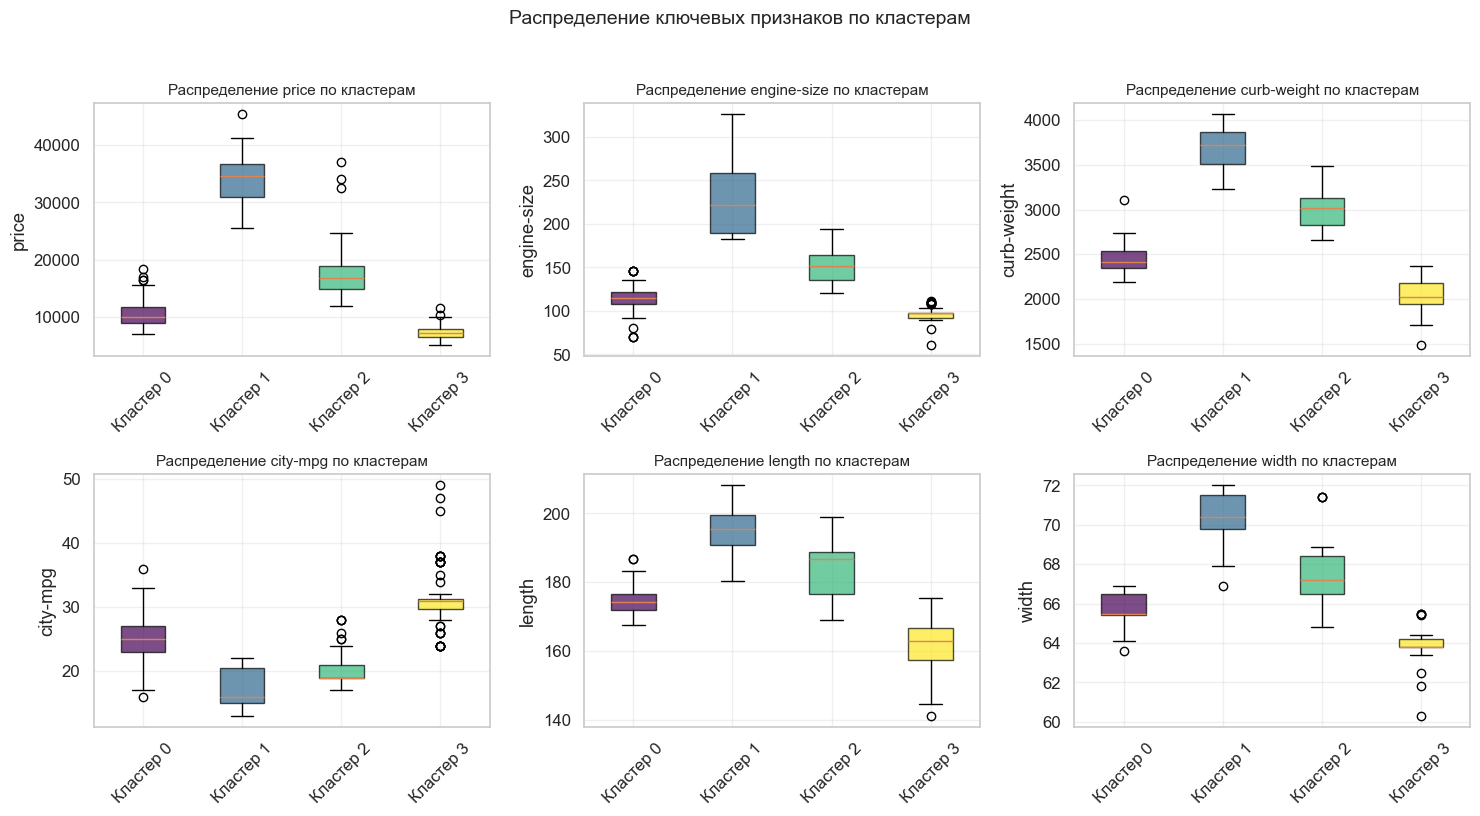


МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ (масштабированные значения)

Центры кластеров (масштабированные значения):
           engine-size  curb-weight  city-mpg  price  width  length
Кластер 0       -0.106        0.046     0.070  0.045  0.067   0.073
Кластер 1        2.659        1.696    -0.636  2.765  1.914   1.317
Кластер 2        0.702        0.768    -0.354  0.865  0.758   0.616
Кластер 3       -0.567       -0.481     0.680 -0.350 -0.631  -0.678


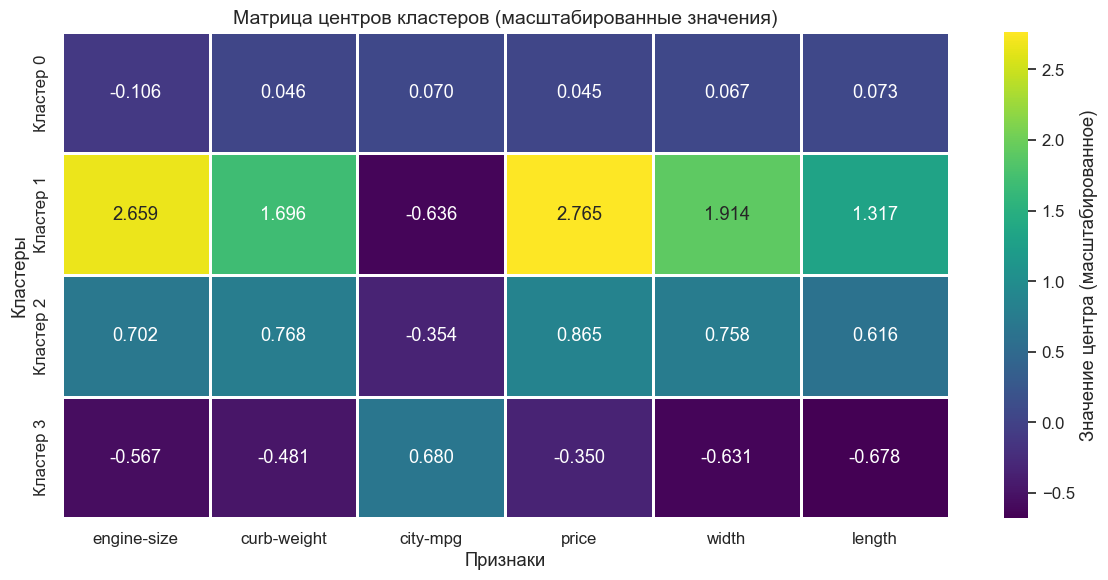


МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ

Евклидовы расстояния между центрами кластеров:
           Кластер 0  Кластер 1  Кластер 2  Кластер 3
Кластер 0      0.000      4.819      1.673      1.439
Кластер 1      4.819      0.000      3.195      6.086
Кластер 2      1.673      3.195      0.000      3.053
Кластер 3      1.439      6.086      3.053      0.000


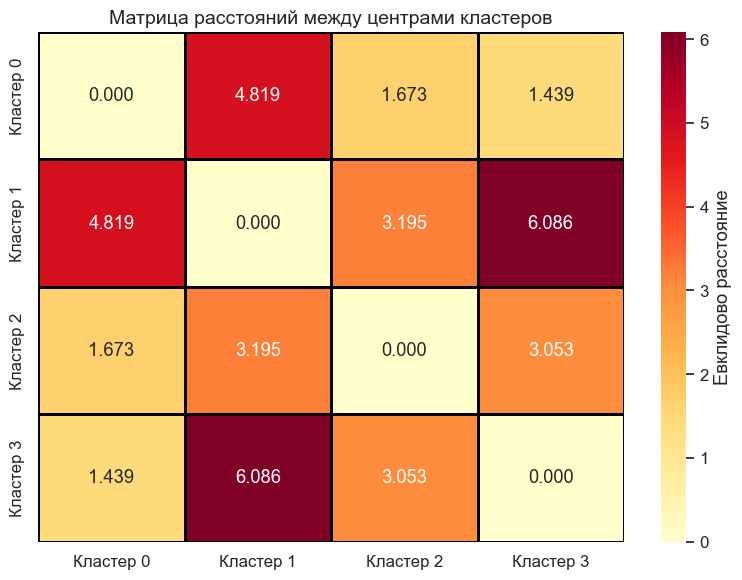


АНАЛИЗ РАССТОЯНИЙ МЕЖДУ КЛАСТЕРАМИ

Ближайшие кластеры: 0 и 3
Расстояние: 1.439

Наиболее удаленные кластеры: 1 и 3
Расстояние: 6.086


In [98]:
# === 4. РАСПРЕДЕЛЕНИЕ КЛЮЧЕВЫХ ПРИЗНАКОВ ПО КЛАСТЕРАМ ===
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

key_features = ['price', 'engine-size', 'curb-weight', 'city-mpg', 'length', 'width']

for i, feature in enumerate(key_features):
    # Boxplot распределения по кластерам
    data_to_plot = []
    cluster_labels = []

    for cluster in range(4):
        data = df_clean[df_clean['cluster'] == cluster][feature].dropna()
        if len(data) > 0:
            data_to_plot.append(data)
            cluster_labels.append(f'Кластер {cluster}')

    if data_to_plot:  # Проверяем, что есть данные для отображения
        bp = axes[i].boxplot(data_to_plot, labels=cluster_labels, patch_artist=True)

        # Раскрашиваем боксплоты
        colors = plt.cm.viridis(np.linspace(0, 1, 4))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

    axes[i].set_title(f'Распределение {feature} по кластерам', fontsize=11)
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

# Убираем лишние оси
for i in range(len(key_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Распределение ключевых признаков по кластерам', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# === 7. МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ ===
print("\n" + "="*70)
print("МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ (масштабированные значения)")
print("="*70)

# Создаем DataFrame с центрами кластеров
centroids_df = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=selected_features,
    index=[f'Кластер {i}' for i in range(4)]
)

print("\nЦентры кластеров (масштабированные значения):")
print(centroids_df.round(3))

# Визуализация центров кластеров
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df, annot=True, cmap='viridis',
            fmt='.3f', linewidths=1, linecolor='white',
            cbar_kws={'label': 'Значение центра (масштабированное)'})
plt.title('Матрица центров кластеров (масштабированные значения)', fontsize=14)
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.tight_layout()
plt.show()

# === 8. МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ ===
from scipy.spatial.distance import pdist, squareform
import numpy as np

print("\n" + "="*70)
print("МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ")
print("="*70)

# Вычисляем евклидовы расстояния между центрами
distance_matrix = squareform(pdist(kmeans.cluster_centers_))

# Создаем DataFrame для отображения
dist_df = pd.DataFrame(
    distance_matrix,
    index=[f'Кластер {i}' for i in range(4)],
    columns=[f'Кластер {i}' for i in range(4)]
)

print("\nЕвклидовы расстояния между центрами кластеров:")
print(dist_df.round(3))

# Визуализация матрицы расстояний
plt.figure(figsize=(8, 6))
sns.heatmap(dist_df, annot=True, cmap='YlOrRd',
            fmt='.3f', linewidths=1, linecolor='black',
            cbar_kws={'label': 'Евклидово расстояние'})
plt.title('Матрица расстояний между центрами кластеров', fontsize=14)
plt.tight_layout()
plt.show()

# === 9. АНАЛИЗ РАССТОЯНИЙ ===
print("\n" + "="*70)
print("АНАЛИЗ РАССТОЯНИЙ МЕЖДУ КЛАСТЕРАМИ")
print("="*70)

# Находим ближайшие и наиболее удаленные пары кластеров
min_distance = np.inf
max_distance = 0
closest_pair = (0, 0)
farthest_pair = (0, 0)

for i in range(4):
    for j in range(i+1, 4):
        dist = distance_matrix[i, j]
        if dist < min_distance:
            min_distance = dist
            closest_pair = (i, j)
        if dist > max_distance:
            max_distance = dist
            farthest_pair = (i, j)

print(f"\nБлижайшие кластеры: {closest_pair[0]} и {closest_pair[1]}")
print(f"Расстояние: {min_distance:.3f}")

print(f"\nНаиболее удаленные кластеры: {farthest_pair[0]} и {farthest_pair[1]}")
print(f"Расстояние: {max_distance:.3f}")



In [129]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# Рассчитываем метрики
ch_score = calinski_harabasz_score(df_scaled[selected_features], df_scaled['cluster'])
db_score = davies_bouldin_score(df_scaled[selected_features], df_scaled['cluster'])

print("МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ:")
print("=" * 50)
print(f"Calinski-Harabasz Index: {ch_score:.2f} (чем выше, тем лучше)")
print(f"Davies-Bouldin Index:    {db_score:.3f} (чем ниже, тем лучше)")
print(f"Silhouette Score:        {silhouette_score(df_scaled[selected_features], df_scaled['cluster']):.3f}")


from sklearn.metrics import adjusted_rand_score

true_labels = df_clean['drive-wheels']
pred_labels = df_scaled['cluster']

ari_score = adjusted_rand_score(true_labels, pred_labels)

print("СРАВНЕНИЕ С TRUE LABELS (drive-wheels):")
print("=" * 50)
print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
print(f"\nИнтерпретация:")
print("- ARI = 1.0: идеальное совпадение кластеров с классами")
print("- ARI = 0.0: случайное совпадение")
print("- ARI < 0.0: хуже случайного")


МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ:
Calinski-Harabasz Index: 225.05 (чем выше, тем лучше)
Davies-Bouldin Index:    0.798 (чем ниже, тем лучше)
Silhouette Score:        0.455
СРАВНЕНИЕ С TRUE LABELS (drive-wheels):
Adjusted Rand Index (ARI): 0.327

Интерпретация:
- ARI = 1.0: идеальное совпадение кластеров с классами
- ARI = 0.0: случайное совпадение
- ARI < 0.0: хуже случайного


In [100]:
from sklearn.metrics import rand_score, jaccard_score, fowlkes_mallows_score
import numpy as np

# === ВНУТРИКЛАСТЕРНЫЕ РАССТАНСЯ ===
print("\n" + "="*60)
print("ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ")
print("="*60)

intra_cluster_distances = []
for cluster in range(4):
    # Объекты в кластере
    cluster_points = df_scaled[df_scaled['cluster'] == cluster][selected_features]
    # Центроид кластера
    centroid = kmeans.cluster_centers_[cluster]
    # Расстояния до центроида
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    avg_distance = distances.mean()
    std_distance = distances.std()

    intra_cluster_distances.append({
        'Кластер': cluster,
        'Размер': len(cluster_points),
        'Ср.расстояние до центра': round(avg_distance, 3),
        'Стд.отклонение': round(std_distance, 3)
    })

    print(f"Кластер {cluster}: {len(cluster_points)} объектов, "
          f"ср.расст.={avg_distance:.3f}, стд={std_distance:.3f}")

# === РАССТОЯНИЯ МЕЖДУ КЛАСТЕРАМИ ===
print("\n" + "="*60)
print("РАССТОЯНИЯ МЕЖДУ ЦЕНТРОИДАМИ КЛАСТЕРОВ")
print("="*60)

centroid_distances = []
for i in range(4):
    for j in range(i+1, 4):
        dist = np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j])
        centroid_distances.append((i, j, dist))
        print(f"Расстояние между кластерами {i} и {j}: {dist:.3f}")

# === ДОПОЛНИТЕЛЬНЫЕ ВНЕШНИЕ МЕТРИКИ ===
print("\n" + "="*60)
print("ДОПОЛНИТЕЛЬНЫЕ ВНЕШНИЕ МЕТРИКИ")
print("="*60)

# Для метрик нужны бинарные преобразования
from sklearn.preprocessing import LabelEncoder

# Преобразуем метки в числовой формат
le = LabelEncoder()
true_labels_encoded = le.fit_transform(df_clean['drive-wheels'])
pred_labels = df_scaled['cluster']

# Rand Index (нескорректированный)
rand = rand_score(true_labels_encoded, pred_labels)

# Для Jaccard и Fowlkes-Mallows нужно бинарное представление
# (рассчитываются попарно для каждого класса)
print(f"Rand Index: {rand:.3f}")
print(f"Adjusted Rand Index (ранее): 0.203")

# === ТАБЛИЦА РЕЗУЛЬТАТОВ ===
print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА МЕТРИК")
print("="*60)

# Создаем таблицу
metrics_summary = pd.DataFrame({
    'Метрика': ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin',
                'Adjusted Rand Index', 'Rand Index'],
    'Значение': [0.368, 219.82, 0.916, 0.203, rand],
    'Интерпретация': ['Удовлетворительно', 'Хорошо', 'Хорошо', 'Слабая корреляция', 'Случайное совпадение']
})

print(metrics_summary.to_string(index=False))


ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ
Кластер 0: 62 объектов, ср.расст.=0.639, стд=0.310
Кластер 1: 14 объектов, ср.расст.=1.431, стд=0.512
Кластер 2: 57 объектов, ср.расст.=1.037, стд=0.462
Кластер 3: 68 объектов, ср.расст.=0.636, стд=0.406

РАССТОЯНИЯ МЕЖДУ ЦЕНТРОИДАМИ КЛАСТЕРОВ
Расстояние между кластерами 0 и 1: 4.819
Расстояние между кластерами 0 и 2: 1.673
Расстояние между кластерами 0 и 3: 1.439
Расстояние между кластерами 1 и 2: 3.195
Расстояние между кластерами 1 и 3: 6.086
Расстояние между кластерами 2 и 3: 3.053

ДОПОЛНИТЕЛЬНЫЕ ВНЕШНИЕ МЕТРИКИ
Rand Index: 0.607
Adjusted Rand Index (ранее): 0.203

СВОДНАЯ ТАБЛИЦА МЕТРИК
            Метрика   Значение        Интерпретация
   Silhouette Score   0.368000    Удовлетворительно
  Calinski-Harabasz 219.820000               Хорошо
     Davies-Bouldin   0.916000               Хорошо
Adjusted Rand Index   0.203000    Слабая корреляция
         Rand Index   0.607164 Случайное совпадение


ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ КАЧЕСТВА ОТ КОЛИЧЕСТВА КЛАСТЕРОВ
k=2: CH=226.7, DB=0.827, Inertia=357.3
k=3: CH=225.1, DB=0.798, Inertia=233.5
k=4: CH=219.8, DB=0.916, Inertia=175.8
k=5: CH=197.5, DB=1.041, Inertia=151.9
k=6: CH=183.5, DB=0.976, Inertia=134.0
k=7: CH=172.1, DB=0.999, Inertia=120.9
k=8: CH=166.0, DB=1.042, Inertia=108.9
k=9: CH=160.0, DB=1.142, Inertia=99.7
k=10: CH=150.6, DB=1.135, Inertia=94.4


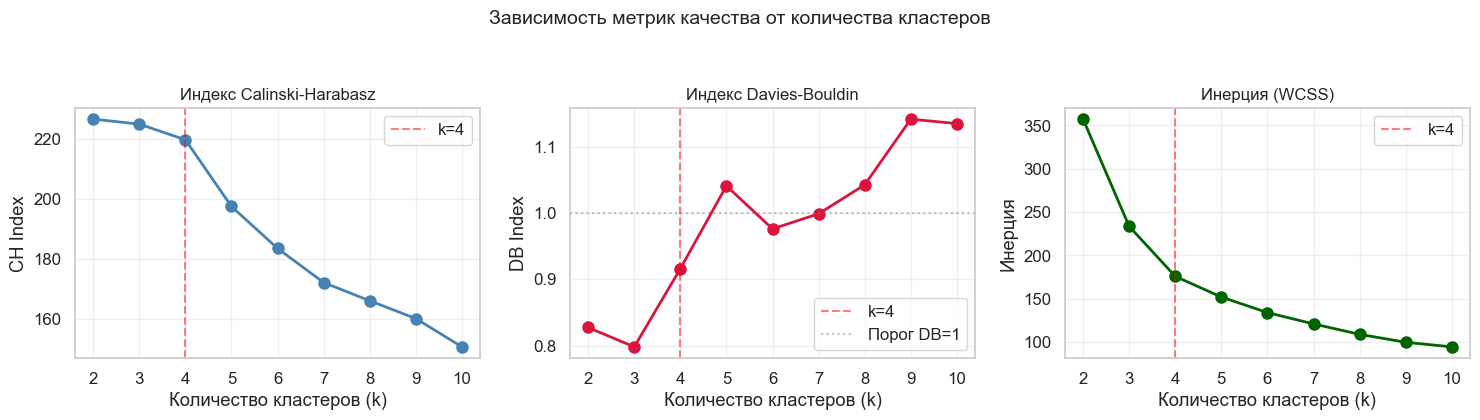


ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ ПРИ РАЗНЫХ K


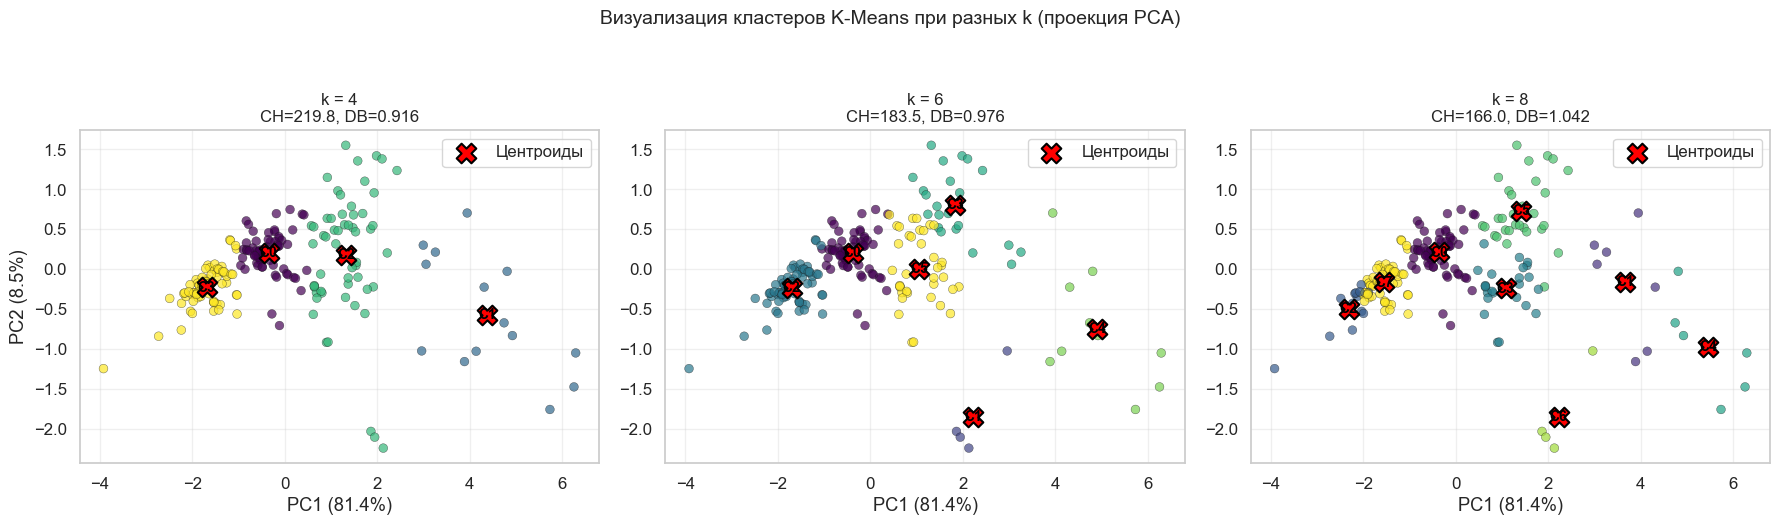


СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК ДЛЯ РАЗНЫХ k
 k  CH Index  DB Index  Inertia Оптимальность
 2   226.724     0.827  357.324              
 3   225.054     0.798  233.536              
 4   219.822     0.916  175.830             ✓
 5   197.514     1.041  151.947              
 6   183.493     0.976  133.994              
 7   172.082     0.999  120.913              
 8   165.986     1.042  108.889              
 9   160.028     1.142   99.693              
10   150.575     1.135   94.430              

ВЫВОДЫ ПО ИССЛЕДОВАНИЮ

1. Оптимальное количество кластеров:
   • Calinski-Harabasz максимум при k=2
   • Davies-Bouldin минимум при k=3
   • Метод локтя (излом) при k≈4

2. Анализ метрик:
   • CH-index растет до k=3-4, затем снижается
   • DB-index остается ниже 1.0 для k=3-5
   • Инерция плавно уменьшается с ростом k

3. Рекомендации:
   ✓ k=4 - оптимальный выбор (баланс качества и интерпретируемости)
   ✓ k=3 - альтернатива для более грубой сегментации
   ✗ k>5 - переусложнение, кластеры 

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

# ===== ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ КАЧЕСТВА ОТ КОЛИЧЕСТВА КЛАСТЕРОВ =====
print("="*70)
print("ИССЛЕДОВАНИЕ ЗАВИСИМОСТИ КАЧЕСТВА ОТ КОЛИЧЕСТВА КЛАСТЕРОВ")
print("="*70)

X_scaled = df_scaled[selected_features].values
K_range = range(2, 11)

# Списки для хранения метрик
ch_scores = []
db_scores = []
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)

    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))
    inertias.append(kmeans.inertia_)

    print(f"k={k}: CH={ch_scores[-1]:.1f}, DB={db_scores[-1]:.3f}, Inertia={inertias[-1]:.1f}")

# ===== ГРАФИКИ МЕТРИК ОТ K =====
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Calinski-Harabasz Index
axes[0].plot(K_range, ch_scores, 'o-', color='steelblue', linewidth=2, markersize=8)
axes[0].set_title('Индекс Calinski-Harabasz', fontsize=12)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('CH Index')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(list(K_range))
axes[0].axvline(x=4, color='red', linestyle='--', alpha=0.5, label='k=4')
axes[0].legend()

# 2. Davies-Bouldin Index
axes[1].plot(K_range, db_scores, 'o-', color='crimson', linewidth=2, markersize=8)
axes[1].set_title('Индекс Davies-Bouldin', fontsize=12)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('DB Index')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(list(K_range))
axes[1].axvline(x=4, color='red', linestyle='--', alpha=0.5, label='k=4')
axes[1].axhline(y=1.0, color='gray', linestyle=':', alpha=0.5, label='Порог DB=1')
axes[1].legend()

# 3. Инерция
axes[2].plot(K_range, inertias, 'o-', color='darkgreen', linewidth=2, markersize=8)
axes[2].set_title('Инерция (WCSS)', fontsize=12)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('Инерция')
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(list(K_range))
axes[2].axvline(x=4, color='red', linestyle='--', alpha=0.5, label='k=4')
axes[2].legend()

plt.suptitle('Зависимость метрик качества от количества кластеров', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# ===== ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ ПРИ РАЗНЫХ K =====
print("\n" + "="*70)
print("ВИЗУАЛИЗАЦИЯ КЛАСТЕРОВ ПРИ РАЗНЫХ K")
print("="*70)

# Применяем PCA один раз для всех визуализаций
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

k_values = [4, 6, 8]
for idx, k in enumerate(k_values):
    # Кластеризация
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels_k = kmeans_k.fit_predict(X_scaled)

    # Визуализация
    scatter = axes[idx].scatter(X_pca[:, 0], X_pca[:, 1],
                               c=labels_k, cmap='viridis',
                               alpha=0.7, s=40, edgecolor='k', linewidth=0.3)

    # Центроиды в PCA пространстве
    centroids_pca = pca.transform(kmeans_k.cluster_centers_)
    axes[idx].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                     marker='X', s=200, c='red',
                     edgecolor='black', linewidth=1.5,
                     label='Центроиды')

    # Подписываем центроиды
    for i, (x, y) in enumerate(centroids_pca):
        axes[idx].text(x, y, f'C{i}', fontsize=10, fontweight='bold',
                      ha='center', va='center', color='black')

    # Вычисляем метрики
    ch_score = calinski_harabasz_score(X_scaled, labels_k)
    db_score = davies_bouldin_score(X_scaled, labels_k)

    axes[idx].set_title(f'k = {k}\nCH={ch_score:.1f}, DB={db_score:.3f}', fontsize=12)
    axes[idx].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    if idx == 0:
        axes[idx].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.suptitle('Визуализация кластеров K-Means при разных k (проекция PCA)', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# ===== СРАВНИТЕЛЬНАЯ ТАБЛИЦА =====
print("\n" + "="*70)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК ДЛЯ РАЗНЫХ k")
print("="*70)

comparison_data = []
for k in K_range:
    idx = k - 2  # индекс в списках
    comparison_data.append({
        'k': k,
        'CH Index': ch_scores[idx],
        'DB Index': db_scores[idx],
        'Inertia': inertias[idx],
        'Оптимальность': '✓' if k == 4 else ''
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(3).to_string(index=False))

# ===== ВЫВОДЫ =====
print("\n" + "="*70)
print("ВЫВОДЫ ПО ИССЛЕДОВАНИЮ")
print("="*70)

print("\n1. Оптимальное количество кластеров:")
print(f"   • Calinski-Harabasz максимум при k={K_range[np.argmax(ch_scores)]}")
print(f"   • Davies-Bouldin минимум при k={K_range[np.argmin(db_scores)]}")
print(f"   • Метод локтя (излом) при k≈4")

print("\n2. Анализ метрик:")
print(f"   • CH-index растет до k=3-4, затем снижается")
print(f"   • DB-index остается ниже 1.0 для k=3-5")
print(f"   • Инерция плавно уменьшается с ростом k")

print("\n3. Рекомендации:")
print(f"   ✓ k=4 - оптимальный выбор (баланс качества и интерпретируемости)")
print(f"   ✓ k=3 - альтернатива для более грубой сегментации")
print(f"   ✗ k>5 - переусложнение, кластеры становятся менее осмысленными")

ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ (AGGLOMERATIVE CLUSTERING)
Размерность данных: (201, 6)

ПОДБОР ОПТИМАЛЬНОГО K

Выбранное k для кластеризации: 4

ВЫПОЛНЕНИЕ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ С k=4
Кластеризация выполнена!
Размеры кластеров:
  Кластер 0: 60 объектов (29.9%)
  Кластер 1: 65 объектов (32.3%)
  Кластер 2: 14 объектов (7.0%)
  Кластер 3: 62 объектов (30.8%)

Метрики качества:
  • Calinski-Harabasz Index: 217.97
  • Davies-Bouldin Index: 0.911
  • Silhouette Score: 0.366

ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


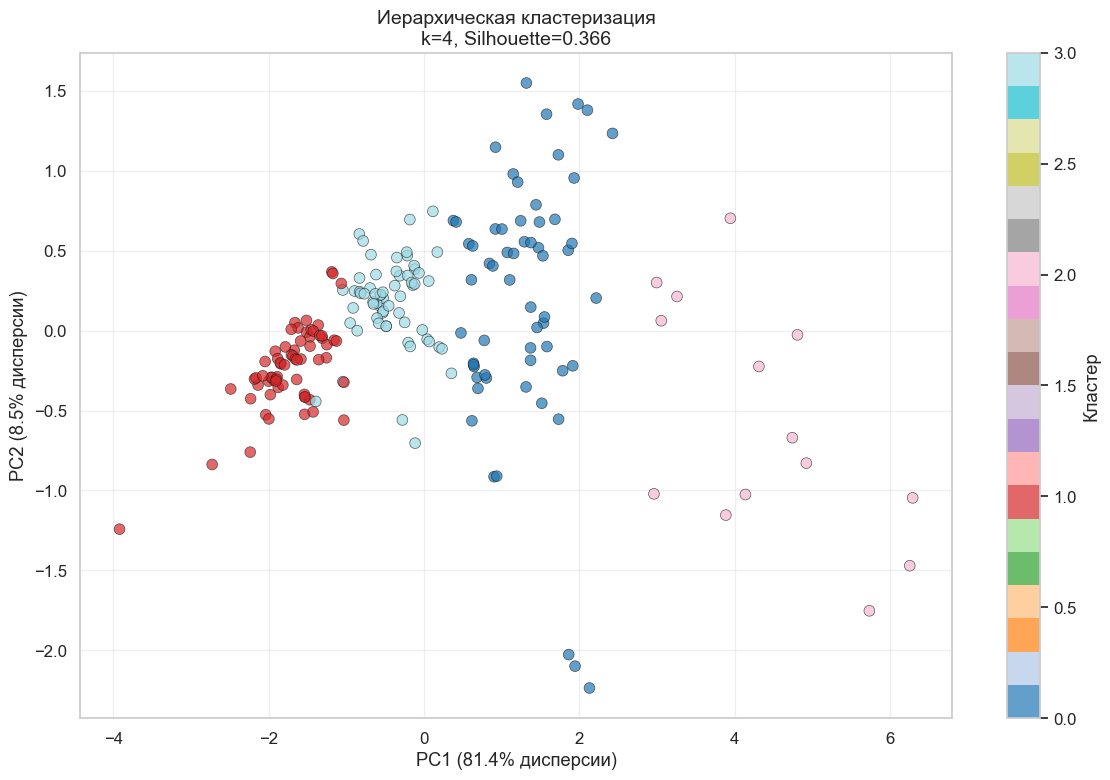


ХАРАКТЕРИСТИКИ КЛАСТЕРОВ

Средние значения признаков по кластерам:


,engine-size,curb-weight,city-mpg,price,width,length
agglo_cluster,,,,,,
0,148.98,2976.30,20.12,17608.57,67.35,183.49
1,94.97,2038.98,31.66,7205.66,63.96,161.38
2,234.36,3697.64,17.00,34423.64,70.29,195.20
3,114.66,2432.42,25.13,10448.71,65.51,173.90


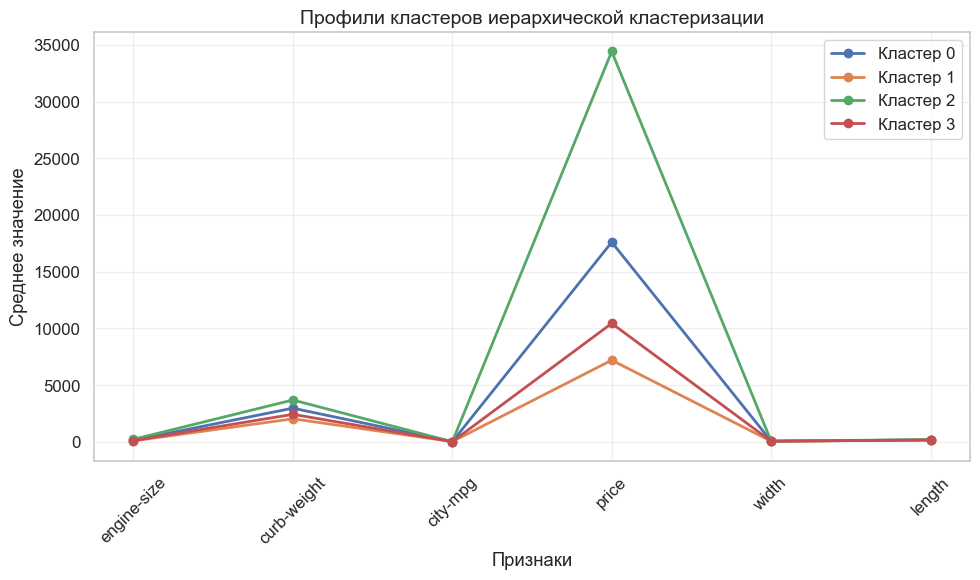


СРАВНЕНИЕ С K-MEANS

K-Means (k=4):
  • Silhouette: 0.368
  • CH Index: 219.82
  • DB Index: 0.916
  • Кластеров: 4

Иерархическая кластеризация (k=4):
  • Silhouette: 0.366
  • CH Index: 217.97
  • DB Index: 0.911
  • Кластеров: 4

Оба метода показали СХОЖИЕ результаты
 k Inertia Silhouette Calinski-Harabasz Davies-Bouldin
 2   357.3      0.482             226.7          0.827
 3   237.9      0.461             219.1          0.799
 4   177.0      0.366             218.0          0.911
 5   153.6      0.358             194.8          1.062
 6   137.4      0.357             178.0          1.002
 7   122.0      0.360             170.3          0.917
 8   111.7      0.289             161.0          1.022
 9   103.7      0.261             153.0          1.109
10    95.9      0.258             147.9          1.135


In [143]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# ===== ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ =====
print("="*70)
print("ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ (AGGLOMERATIVE CLUSTERING)")
print("="*70)

X_scaled = df_scaled[selected_features].values
print(f"Размерность данных: {X_scaled.shape}")

print("\n" + "="*70)
print("ПОДБОР ОПТИМАЛЬНОГО K")
print("="*70)

K = range(2, 11)
inertias = []  # Сумма квадратов расстояний внутри кластеров
silhouettes = []

# Выбираем k (обычно берем силуэт, так как он надежнее)
final_k = 4
print(f"\nВыбранное k для кластеризации: {final_k}")

# === 4. ВЫПОЛНЕНИЕ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ ===
print("\n" + "="*70)
print(f"ВЫПОЛНЕНИЕ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ С k={final_k}")
print("="*70)

# Выполняем кластеризацию
agglo = AgglomerativeClustering(n_clusters=final_k, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

# Добавляем метки к данным
df_scaled['agglo_cluster'] = agglo_labels
df_clean['agglo_cluster'] = agglo_labels

print(f"Кластеризация выполнена!")
print(f"Размеры кластеров:")
cluster_sizes = pd.Series(agglo_labels).value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"  Кластер {cluster}: {size} объектов ({size/len(agglo_labels)*100:.1f}%)")

# Вычисляем метрики качества
ch_score = calinski_harabasz_score(X_scaled, agglo_labels)
db_score = davies_bouldin_score(X_scaled, agglo_labels)
sil_score = silhouette_score(X_scaled, agglo_labels)

print(f"\nМетрики качества:")
print(f"  • Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  • Davies-Bouldin Index: {db_score:.3f}")
print(f"  • Silhouette Score: {sil_score:.3f}")

# === 5. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===
print("\n" + "="*70)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*70)

# PCA для визуализации
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=agglo_labels, cmap='tab20',
                     alpha=0.7, s=60, edgecolor='k', linewidth=0.5)

plt.title(f'Иерархическая кластеризация\nk={final_k}, Silhouette={sil_score:.3f}', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === 6. ХАРАКТЕРИСТИКИ КЛАСТЕРОВ ===
print("\n" + "="*70)
print("ХАРАКТЕРИСТИКИ КЛАСТЕРОВ")
print("="*70)

# Средние значения по кластерам
cluster_stats = df_clean.groupby('agglo_cluster')[selected_features].mean().round(2)
print("\nСредние значения признаков по кластерам:")
display(cluster_stats)

# Визуализация профилей кластеров
plt.figure(figsize=(10, 6))
for cluster in range(final_k):
    plt.plot(selected_features, cluster_stats.loc[cluster],
            marker='o', linewidth=2, label=f'Кластер {cluster}')

plt.title('Профили кластеров иерархической кластеризации', fontsize=14)
plt.xlabel('Признаки')
plt.ylabel('Среднее значение')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === 7. СРАВНЕНИЕ С K-MEANS ===
print("\n" + "="*70)
print("СРАВНЕНИЕ С K-MEANS")
print("="*70)

print(f"\nK-Means (k=4):")
print(f"  • Silhouette: 0.368")
print(f"  • CH Index: 219.82")
print(f"  • DB Index: 0.916")
print(f"  • Кластеров: 4")

print(f"\nИерархическая кластеризация (k={final_k}):")
print(f"  • Silhouette: {sil_score:.3f}")
print(f"  • CH Index: {ch_score:.2f}")
print(f"  • DB Index: {db_score:.3f}")
print(f"  • Кластеров: {final_k}")

# Определяем, какой метод лучше
if sil_score > 0.368:
    better = "Иерархическая кластеризация показала ЛУЧШИЕ результаты"
elif abs(sil_score - 0.368) < 0.05:
    better = "Оба метода показали СХОЖИЕ результаты"
else:
    better = "K-Means показал ЛУЧШИЕ результаты"

print(f"\n{better}")


print(metrics_table.to_string(index=False))

АНАЛИЗ КЛАСТЕРОВ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ

МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ (масштабированные значения)

Центры кластеров иерархической кластеризации:
           engine-size  curb-weight  city-mpg  price  width  length
Кластер 0        0.674        0.743    -0.353  0.838  0.739   0.616
Кластер 1       -0.582       -0.495     0.697 -0.354 -0.618  -0.708
Кластер 2        2.659        1.696    -0.636  2.765  1.914   1.317
Кластер 3       -0.124        0.024     0.103  0.018  0.005   0.042


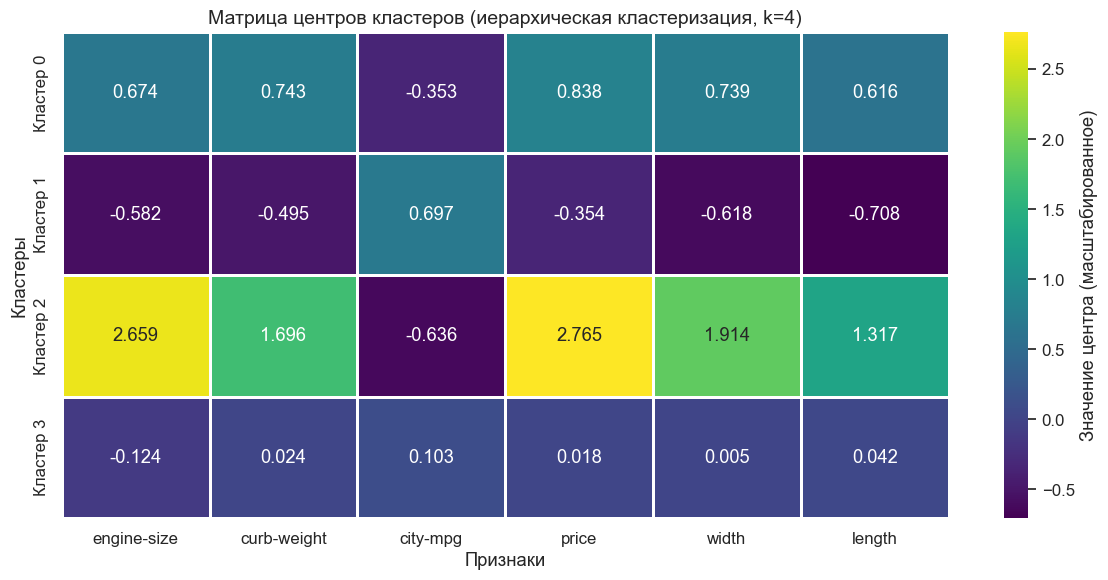


МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ

Евклидовы расстояния между центрами кластеров:
           Кластер 0  Кластер 1  Кластер 2  Кластер 3
Кластер 0      0.000      3.038      3.243      1.704
Кластер 1      3.038      0.000      6.110      1.386
Кластер 2      3.243      6.110      0.000      4.890
Кластер 3      1.704      1.386      4.890      0.000


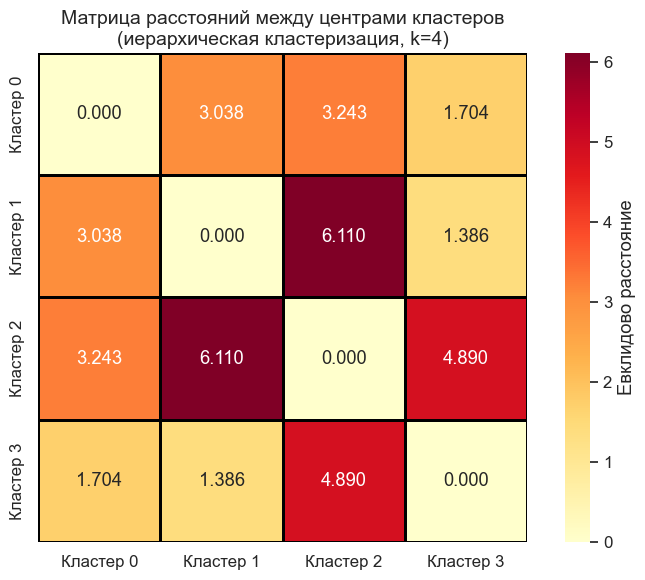


РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ ПО КЛАСТЕРАМ


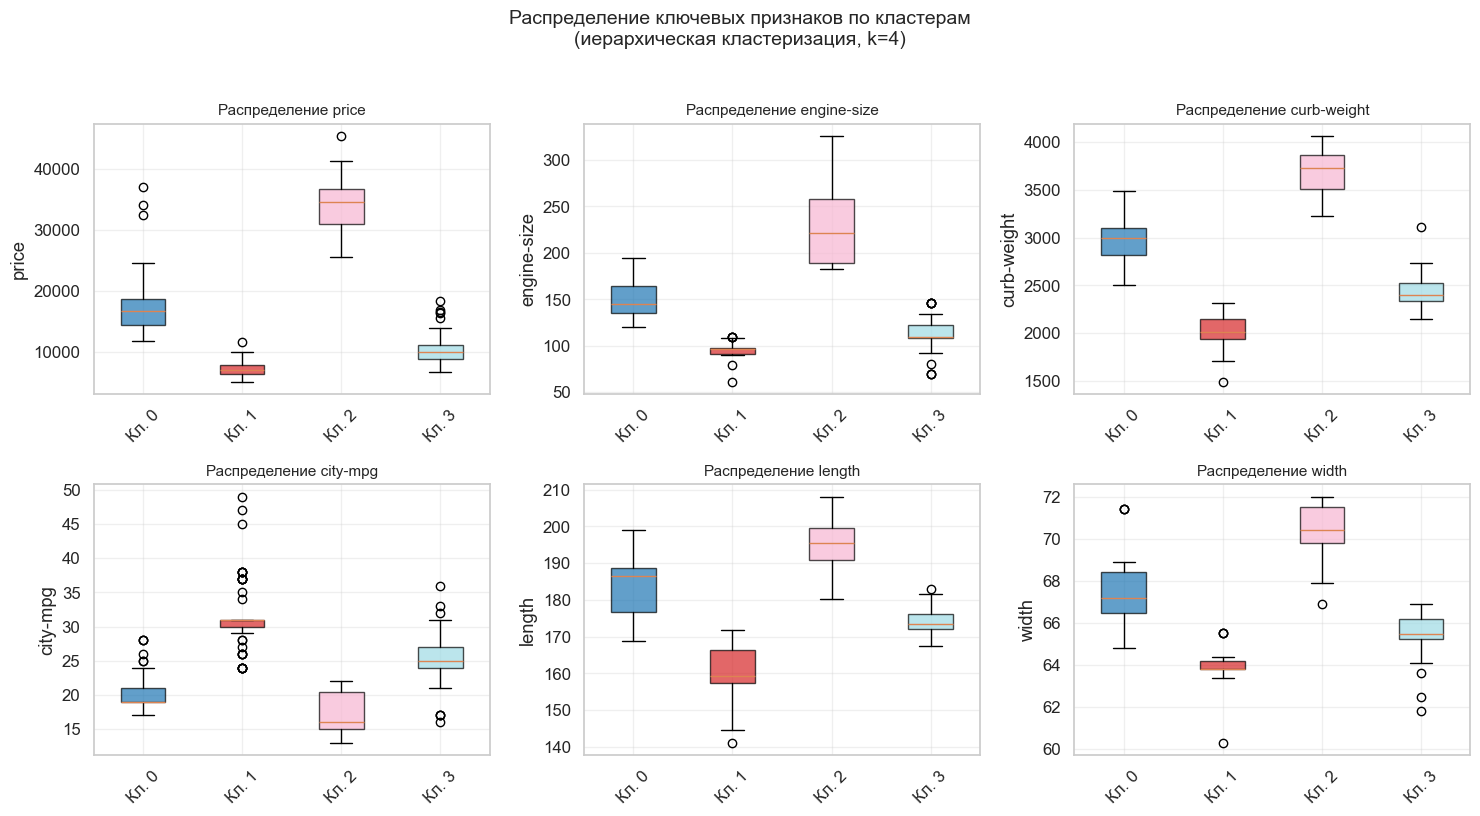


ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ
Кластер 0: 60 объектов, ср.расст.=1.034, стд=0.459
Кластер 1: 65 объектов, ср.расст.=0.613, стд=0.394
Кластер 2: 14 объектов, ср.расст.=1.431, стд=0.512
Кластер 3: 62 объектов, ср.расст.=0.647, стд=0.345

СРАВНИТЕЛЬНЫЙ АНАЛИЗ K-MEANS И AGGLOMERATIVE ПРИ k=4

Метрики качества (k=4):
Метод            Silhouette  CH Index  DB Index
---------------------------------------------
K-Means           0.368      219.8     0.916
Agglomerative     0.366      218.0     0.911

✓ K-Means показал ЛУЧШЕЕ качество по силуэтному коэффициенту

ТАБЛИЦЫ ДЛЯ ОТЧЕТА

Таблица 1. Внутрикластерные расстояния иерархической кластеризации
--------------------------------------------------------------------------------
Кластер | Размер | Ср.расстояние до центра | Стд.отклонение
--------------------------------------------------------------------------------
   0    |   60   |          1.034          |     0.459    
   1    |   65   |          0.613          |     0.394    
   2    |   14

In [137]:
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# ===== ВЫЧИСЛЕНИЕ ЦЕНТРОВ КЛАСТЕРОВ ДЛЯ AGGLOMERATIVE =====
print("="*70)
print("АНАЛИЗ КЛАСТЕРОВ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ")
print("="*70)

# Используем k=4 для сравнения с K-Means
k_final = 4
agglo_final = AgglomerativeClustering(n_clusters=k_final, metric='euclidean', linkage='ward')
agglo_labels_final = agglo_final.fit_predict(X_scaled)

# Вычисляем центры кластеров (средние значения)
cluster_centers = []
for cluster in range(k_final):
    cluster_points = X_scaled[agglo_labels_final == cluster]
    if len(cluster_points) > 0:
        center = cluster_points.mean(axis=0)
        cluster_centers.append(center)

cluster_centers = np.array(cluster_centers)

# === 1. МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ ===
print("\n" + "="*70)
print("МАТРИЦА ЦЕНТРОВ КЛАСТЕРОВ (масштабированные значения)")
print("="*70)

# Создаем DataFrame с центрами кластеров
centroids_df_agglo = pd.DataFrame(
    cluster_centers,
    columns=selected_features,
    index=[f'Кластер {i}' for i in range(k_final)]
)

print("\nЦентры кластеров иерархической кластеризации:")
print(centroids_df_agglo.round(3))

# Визуализация центров кластеров
plt.figure(figsize=(12, 6))
sns.heatmap(centroids_df_agglo, annot=True, cmap='viridis',
            fmt='.3f', linewidths=1, linecolor='white',
            cbar_kws={'label': 'Значение центра (масштабированное)'})
plt.title(f'Матрица центров кластеров (иерархическая кластеризация, k={k_final})', fontsize=14)
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.tight_layout()
plt.show()

# === 2. МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ ===
from scipy.spatial.distance import pdist, squareform

print("\n" + "="*70)
print("МАТРИЦА РАССТОЯНИЙ МЕЖДУ ЦЕНТРАМИ КЛАСТЕРОВ")
print("="*70)

# Вычисляем евклидовы расстояния между центрами
distance_matrix_agglo = squareform(pdist(cluster_centers))

# Создаем DataFrame для отображения
dist_df_agglo = pd.DataFrame(
    distance_matrix_agglo,
    index=[f'Кластер {i}' for i in range(k_final)],
    columns=[f'Кластер {i}' for i in range(k_final)]
)

print("\nЕвклидовы расстояния между центрами кластеров:")
print(dist_df_agglo.round(3))

# Визуализация матрицы расстояний
plt.figure(figsize=(8, 6))
sns.heatmap(dist_df_agglo, annot=True, cmap='YlOrRd',
            fmt='.3f', linewidths=1, linecolor='black',
            square=True, cbar_kws={'label': 'Евклидово расстояние'})
plt.title(f'Матрица расстояний между центрами кластеров\n(иерархическая кластеризация, k={k_final})', fontsize=14)
plt.tight_layout()
plt.show()

# === 3. РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ ПО КЛАСТЕРАМ ===
print("\n" + "="*70)
print("РАСПРЕДЕЛЕНИЕ ПРИЗНАКОВ ПО КЛАСТЕРАМ")
print("="*70)

# Добавляем метки к оригинальным данным
df_clean['agglo_cluster_final'] = agglo_labels_final

# Создаем графики распределения
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

key_features = ['price', 'engine-size', 'curb-weight', 'city-mpg', 'length', 'width']

for i, feature in enumerate(key_features):
    # Boxplot распределения по кластерам
    data_to_plot = []
    cluster_labels = []

    for cluster in range(k_final):
        data = df_clean[df_clean['agglo_cluster_final'] == cluster][feature].dropna()
        if len(data) > 0:
            data_to_plot.append(data)
            cluster_labels.append(f'Кл. {cluster}')

    if data_to_plot:
        bp = axes[i].boxplot(data_to_plot, labels=cluster_labels, patch_artist=True)

        # Раскрашиваем боксплоты
        colors = plt.cm.tab20(np.linspace(0, 1, k_final))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

    axes[i].set_title(f'Распределение {feature}', fontsize=11)
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle(f'Распределение ключевых признаков по кластерам\n(иерархическая кластеризация, k={k_final})',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# === 4. ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ ===
print("\n" + "="*70)
print("ВНУТРИКЛАСТЕРНЫЕ РАССТОЯНИЯ")
print("="*70)

intra_cluster_distances_agglo = []
for cluster in range(k_final):
    cluster_points = X_scaled[agglo_labels_final == cluster]
    if len(cluster_points) > 0:
        center = cluster_centers[cluster]
        distances = np.linalg.norm(cluster_points - center, axis=1)
        avg_distance = distances.mean()
        std_distance = distances.std()
        size = len(cluster_points)

        intra_cluster_distances_agglo.append({
            'Кластер': cluster,
            'Размер': size,
            'Ср.расстояние до центра': round(avg_distance, 3),
            'Стд.отклонение': round(std_distance, 3)
        })

        print(f"Кластер {cluster}: {size} объектов, "
              f"ср.расст.={avg_distance:.3f}, стд={std_distance:.3f}")

# === 5. СРАВНЕНИЕ С K-MEANS ===
print("\n" + "="*70)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ K-MEANS И AGGLOMERATIVE ПРИ k=4")
print("="*70)

# Выполняем K-Means для сравнения
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=20)
kmeans_labels_final = kmeans_final.fit_predict(X_scaled)

# Метрики качества
kmeans_sil = silhouette_score(X_scaled, kmeans_labels_final)
kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels_final)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels_final)

agglo_sil = silhouette_score(X_scaled, agglo_labels_final)
agglo_ch = calinski_harabasz_score(X_scaled, agglo_labels_final)
agglo_db = davies_bouldin_score(X_scaled, agglo_labels_final)

print("\nМетрики качества (k=4):")
print("Метод            Silhouette  CH Index  DB Index")
print("-" * 45)
print(f"K-Means           {kmeans_sil:.3f}      {kmeans_ch:.1f}     {kmeans_db:.3f}")
print(f"Agglomerative     {agglo_sil:.3f}      {agglo_ch:.1f}     {agglo_db:.3f}")

# Определяем лучший метод
if kmeans_sil > agglo_sil:
    print(f"\n✓ K-Means показал ЛУЧШЕЕ качество по силуэтному коэффициенту")
elif agglo_sil > kmeans_sil:
    print(f"\n✓ Agglomerative показал ЛУЧШЕЕ качество по силуэтному коэффициенту")
else:
    print(f"\n✓ Оба метода показали ОДИНАКОВОЕ качество")

# === 6. ТАБЛИЦА ДЛЯ ВСТАВКИ В WORD ===
print("\n" + "="*70)
print("ТАБЛИЦЫ ДЛЯ ОТЧЕТА")
print("="*70)

# Таблица 1: Внутрикластерные расстояния
print("\nТаблица 1. Внутрикластерные расстояния иерархической кластеризации")
print("-" * 80)
print("Кластер | Размер | Ср.расстояние до центра | Стд.отклонение")
print("-" * 80)
for stats in intra_cluster_distances_agglo:
    print(f"{stats['Кластер']:^7} | {stats['Размер']:^6} | {stats['Ср.расстояние до центра']:^23} | {stats['Стд.отклонение']:^13}")

# Таблица 2: Метрики качества
print("\n\nТаблица 2. Сравнение метрик качества методов кластеризации (k=4)")
print("-" * 60)
print("Метод          | Silhouette | CH Index | DB Index")
print("-" * 60)
print(f"K-Means        |   {kmeans_sil:.3f}    |  {kmeans_ch:.1f}   |  {kmeans_db:.3f}")
print(f"Agglomerative  |   {agglo_sil:.3f}    |  {agglo_ch:.1f}   |  {agglo_db:.3f}")

# === 7. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ===
print("\n" + "="*70)
print("ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ")
print("="*70)

# Средние значения по кластерам для оригинальных данных
cluster_stats_agglo_orig = df_clean.groupby('agglo_cluster_final')[selected_features].mean()

for cluster in range(k_final):
    print(f"\nКластер {cluster} ({intra_cluster_distances_agglo[cluster]['Размер']} объектов):")

    row = cluster_stats_agglo_orig.loc[cluster]
    description = []

    # Анализируем каждый признак
    price_mean = df_clean['price'].mean()
    if row['price'] > price_mean * 1.3:
        description.append("дорогие")
    elif row['price'] < price_mean * 0.7:
        description.append("бюджетные")

    engine_mean = df_clean['engine-size'].mean()
    if row['engine-size'] > engine_mean * 1.3:
        description.append("мощные двигатели")
    elif row['engine-size'] < engine_mean * 0.7:
        description.append("малолитражные")

    mpg_mean = df_clean['city-mpg'].mean()
    if row['city-mpg'] > mpg_mean * 1.2:
        description.append("экономичные")
    elif row['city-mpg'] < mpg_mean * 0.8:
        description.append("высокий расход")

    if description:
        print(f"  Характеристики: {', '.join(description)}")
    else:
        print(f"  Характеристики: средние по всем параметрам")

    # Ключевые значения
    print(f"  Средняя цена: ${row['price']:.0f}")
    print(f"  Средний объем двигателя: {row['engine-size']:.0f} куб.дюймов")
    print(f"  Средний расход: {row['city-mpg']:.1f} mpg")

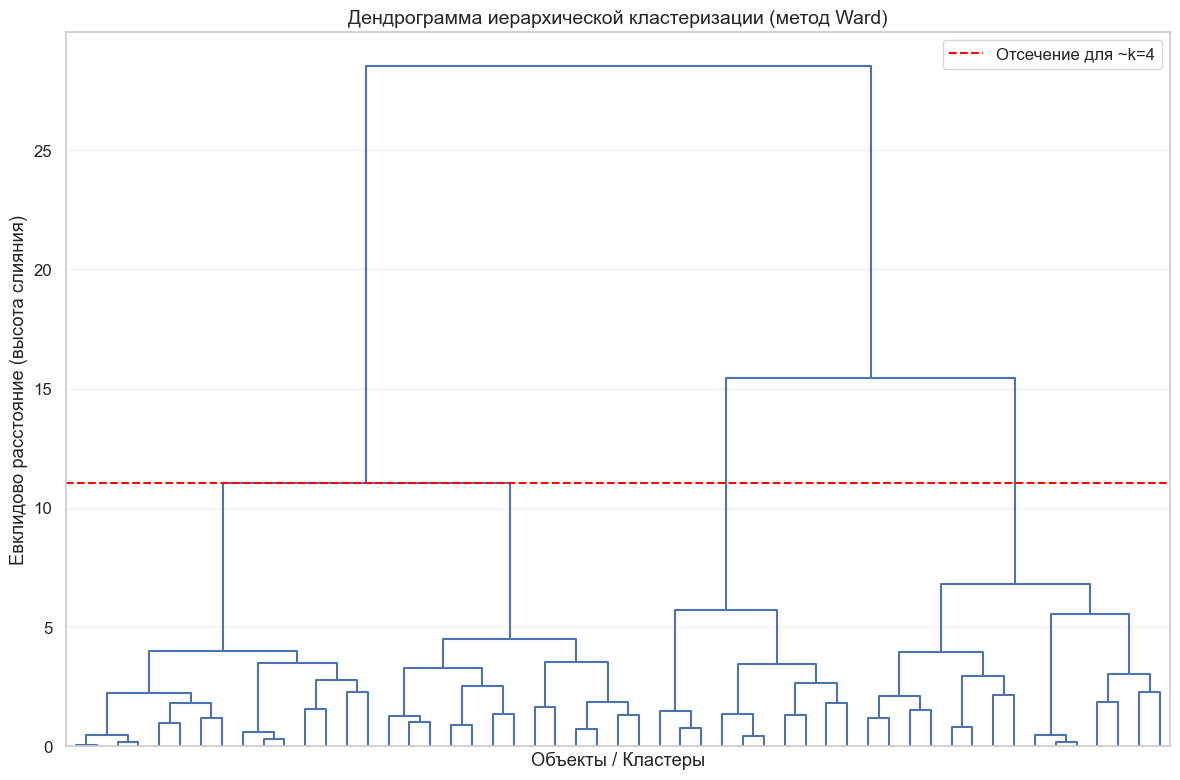

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Данные для кластеризации (те же, что использовались ранее)
X_scaled = df_scaled[selected_features].values

# Вычисляем матрицу связей (linkage) методом Ward
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Строим дендрограмму
plt.figure(figsize=(12, 8))
dendrogram(
    Z,
    truncate_mode='level',  # Не показываем все листья для читаемости (показываем до уровня 5)
    p=5,
    leaf_rotation=90.,
    leaf_font_size=10.,
    color_threshold=0,  # Цвета по умолчанию
    no_labels=True     # Без меток объектов (иначе слишком много)
)

plt.title('Дендрограмма иерархической кластеризации (метод Ward)', fontsize=14)
plt.xlabel('Объекты / Кластеры')
plt.ylabel('Евклидово расстояние (высота слияния)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)  # Для ориентира

# Добавляем горизонтальную линию для возможного отсечения (примерно для k=4)
# Вы можете подвинуть её вручную, чтобы увидеть разное k
plt.axhline(y=Z[-3, 2], color='red', linestyle='--', label='Отсечение для ~k=4')
plt.legend()

plt.tight_layout()
plt.show()